# Juvenile Crime Analysis in Maharashtra (2017–2022)

## Project Overview
This project performs comprehensive Exploratory Data Analysis (EDA) and applies predictive models to understand and forecast juvenile crime trends in Maharashtra, India.

**Dataset:** districtwise-sll-crime-by-juveniles-2017-onwards.csv from India Data Portal

**Objective:**
- Analyze juvenile crime patterns across districts in Maharashtra
- Identify trends and anomalies
- Build predictive models to forecast future crime rates
- Create interactive visualizations for insights


## 1. Data Loading and Initial Exploration


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, silhouette_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
import xgboost as xgb
import lightgbm as lgb

try:
    import catboost as cb
except ImportError:
    print("CatBoost not found. Installing CatBoost...")
    !pip install catboost
    import catboost as cb
    print("CatBoost installed and imported successfully!")

from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Input, Dense
import pickle
import os

warnings.filterwarnings('ignore')

# Set style for better plots
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
sns.set_palette("husl")

# Create outputs directory if it doesn't exist
os.makedirs('outputs/plots', exist_ok=True)
os.makedirs('outputs/data', exist_ok=True)
os.makedirs('outputs/models', exist_ok=True)

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

Libraries imported successfully!
TensorFlow version: 2.19.0


In [7]:
# Load the dataset
df = pd.read_csv('districtwise-sll-crime-by-juveniles-2017-onwards.csv')

# Display basic information
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(f"Shape: {df.shape}")
print(f"\nColumns ({len(df.columns)}):")
print(df.columns.tolist())
print(f"\nData Types:")
print(df.dtypes)
print(f"\nFirst few rows:")
df.head()


DATASET INFORMATION
Shape: (5305, 79)

Columns (79):
['id', 'year', 'state_name', 'state_code', 'district_name', 'district_code', 'registration_circles', 'dowry_prohibition', 'traffic_prevention', 'prevention_of_women_against_domestic_voilence', 'indecent_representation_of_women_prohibition', 'protection_of_children_from_sexual_offences', 'juvenile_justice_care_and_protectione_of_children', 'prohibition_of_child_marriage', 'pre_natal_diagnotics_tech_reg_and_prev_of_misuse', 'child_labour_prohibition_and_regulation', 'medical_termination_of_pregnancy', 'prevention_of_atrocities_against_sc', 'prevention_of_atrocities_against_st', 'protection_of_civil_rights_against_sc', 'protection_of_civil_rights_against_st', 'prevention_of_damage_to_public_property', 'unlawful_activities', 'official_secrets', 'arms_act', 'legal_licensed_arms', 'illegal_licensed_arms', 'other_arms', 'explosive_act', 'explosive_substance', 'it_act', 'copy_right_act', 'trade_mark_act', 'lotteries_regulation', 'chit_funds_

,id,year,state_name,state_code,district_name,district_code,registration_circles,dowry_prohibition,traffic_prevention,prevention_of_women_against_domestic_voilence,...,bonded_labour_system_abolition_against_st,bonded_labour_system_abolition_against_others,prevention_of_insults_to_national_honour,defacement_of_public_property,transplantation_of_human_organs,mental_health,motor_vehicle,city_town_police_act,other_local_state_act,other_sll_crime
0,0,2017,Andhra Pradesh,28,Ananthapuramu,502,Anantapur,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2018,Andhra Pradesh,28,Ananthapuramu,502,Anantapur,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2019,Andhra Pradesh,28,Ananthapuramu,502,Anantapur,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2020,Andhra Pradesh,28,Ananthapuramu,502,Anantapur,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2021,Andhra Pradesh,28,Ananthapuramu,502,Anantapur,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum().sum(), "total missing values")
missing_cols = df.isnull().sum()
print(missing_cols[missing_cols > 0])

# Check unique states
print(f"\nUnique states: {df['state_name'].nunique()}")
print(f"States: {df['state_name'].unique()[:10]}...")  # Show first 10

# Check year range
print(f"\nYear range: {df['year'].min()} - {df['year'].max()}")
print(f"Unique years: {sorted(df['year'].unique())}")


Missing values per column:
2 total missing values
protection_of_children_from_sexual_offences    1
prevention_of_atrocities_against_st            1
dtype: int64

Unique states: 36
States: ['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jharkhand']...

Year range: 2017 - 2022
Unique years: [np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]


## 2. Data Cleaning


In [9]:
# Identify crime columns (all numeric columns except id, year, state_code, district_code)
crime_columns = [col for col in df.columns
                 if col not in ['id', 'year', 'state_name', 'state_code', 'district_name',
                               'district_code', 'registration_circles']]

print(f"Total crime columns: {len(crime_columns)}")
print(f"Sample crime columns: {crime_columns[:5]}...")

# Fill missing values in crime columns with 0
df[crime_columns] = df[crime_columns].fillna(0)

print("\nMissing values after filling:")
print(df[crime_columns].isnull().sum().sum())


Total crime columns: 72
Sample crime columns: ['dowry_prohibition', 'traffic_prevention', 'prevention_of_women_against_domestic_voilence', 'indecent_representation_of_women_prohibition', 'protection_of_children_from_sexual_offences']...

Missing values after filling:
0


In [10]:
# Drop unnecessary columns
columns_to_drop = ['id', 'registration_circles']
df_clean = df.drop(columns=columns_to_drop, errors='ignore')

print(f"Shape before dropping: {df.shape}")
print(f"Shape after dropping: {df_clean.shape}")
print(f"Dropped columns: {columns_to_drop}")


Shape before dropping: (5305, 79)
Shape after dropping: (5305, 77)
Dropped columns: ['id', 'registration_circles']


In [11]:
# Create total_crime column by summing all crime columns
df_clean['total_crime'] = df_clean[crime_columns].sum(axis=1)

print(f"Total crime column created!")
print(f"Total crime statistics:")
print(df_clean['total_crime'].describe())


Total crime column created!
Total crime statistics:
count    5305.000000
mean        4.104807
std        13.868509
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       662.000000
Name: total_crime, dtype: float64


In [12]:
# Filter dataset to include only Maharashtra
df_maharashtra = df_clean[df_clean['state_name'] == 'Maharashtra'].copy()

print(f"Shape before filtering: {df_clean.shape}")
print(f"Shape after filtering (Maharashtra only): {df_maharashtra.shape}")
print(f"\nMaharashtra data summary:")
print(f"Districts: {df_maharashtra['district_name'].nunique()}")
print(f"Years: {sorted(df_maharashtra['year'].unique())}")
print(f"Total records: {len(df_maharashtra)}")

# Display first few rows
df_maharashtra.head()


Shape before filtering: (5305, 78)
Shape after filtering (Maharashtra only): (289, 78)

Maharashtra data summary:
Districts: 36
Years: [np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
Total records: 289


,year,state_name,state_code,district_name,district_code,dowry_prohibition,traffic_prevention,prevention_of_women_against_domestic_voilence,indecent_representation_of_women_prohibition,protection_of_children_from_sexual_offences,...,bonded_labour_system_abolition_against_others,prevention_of_insults_to_national_honour,defacement_of_public_property,transplantation_of_human_organs,mental_health,motor_vehicle,city_town_police_act,other_local_state_act,other_sll_crime,total_crime
2208,2020,Maharashtra,27,Ahmednagar,466,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2213,2020,Maharashtra,27,Akola,467,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2218,2017,Maharashtra,27,Ahmednagar,466,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,2020,Maharashtra,27,Amravati,468,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2223,2018,Maharashtra,27,Ahmednagar,466,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Save cleaned data
df_maharashtra.to_csv('outputs/data/maharashtra_cleaned.csv', index=False)
print("Cleaned data saved to outputs/data/maharashtra_cleaned.csv")


Cleaned data saved to outputs/data/maharashtra_cleaned.csv


## 3. Exploratory Data Analysis (EDA)

### 3.1 Univariate Analysis


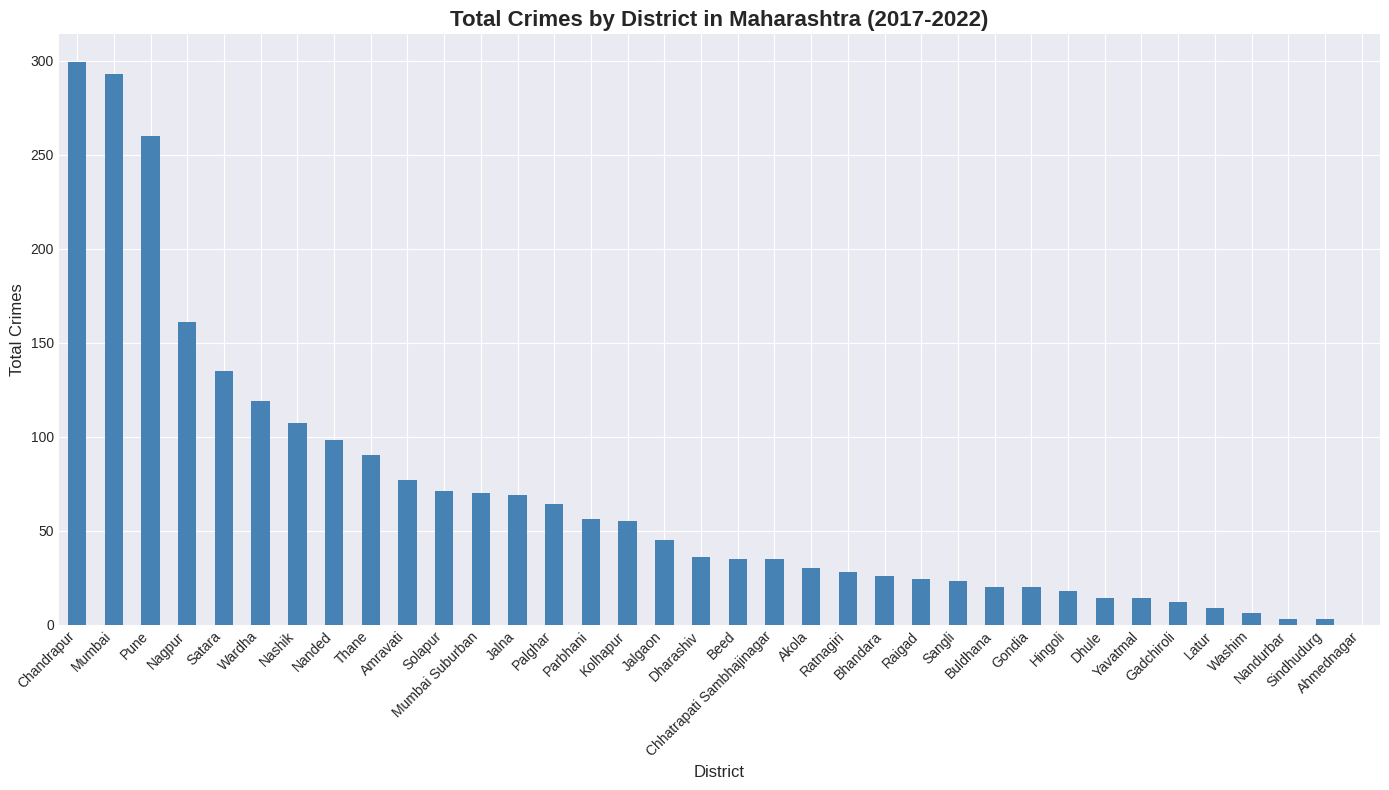

Total districts: 36

Top 5 districts by total crimes:
district_name
Chandrapur    299.0
Mumbai        293.0
Pune          260.0
Nagpur        161.0
Satara        135.0
Name: total_crime, dtype: float64

Bottom 5 districts by total crimes:
district_name
Latur         9.0
Washim        6.0
Nandurbar     3.0
Sindhudurg    3.0
Ahmednagar    0.0
Name: total_crime, dtype: float64


In [14]:
# Total crimes by district
district_crimes = df_maharashtra.groupby('district_name')['total_crime'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
district_crimes.plot(kind='bar', color='steelblue')
plt.title('Total Crimes by District in Maharashtra (2017-2022)', fontsize=16, fontweight='bold')
plt.xlabel('District', fontsize=12)
plt.ylabel('Total Crimes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('outputs/plots/total_crimes_by_district.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Total districts: {len(district_crimes)}")
print(f"\nTop 5 districts by total crimes:")
print(district_crimes.head())
print(f"\nBottom 5 districts by total crimes:")
print(district_crimes.tail())


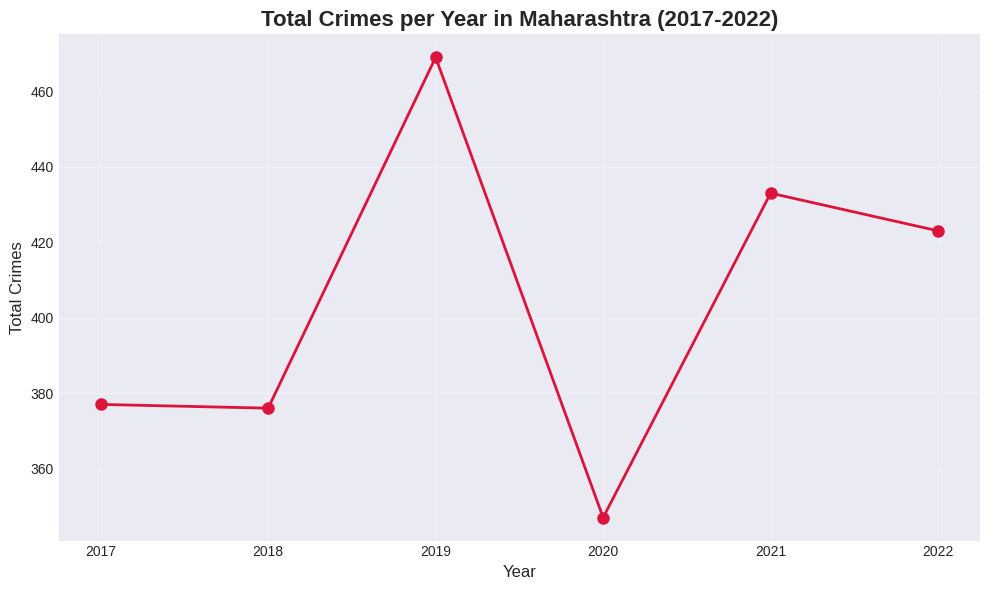

Yearly crime statistics:
year
2017    377.0
2018    376.0
2019    469.0
2020    347.0
2021    433.0
2022    423.0
Name: total_crime, dtype: float64

Average crimes per year: 404.17
Trend: Increasing


In [15]:
# Total crimes per year
yearly_crimes = df_maharashtra.groupby('year')['total_crime'].sum()

plt.figure(figsize=(10, 6))
yearly_crimes.plot(kind='line', marker='o', linewidth=2, markersize=8, color='crimson')
plt.title('Total Crimes per Year in Maharashtra (2017-2022)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Crimes', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('outputs/plots/total_crimes_per_year.png', dpi=300, bbox_inches='tight')
plt.show()

print("Yearly crime statistics:")
print(yearly_crimes)
print(f"\nAverage crimes per year: {yearly_crimes.mean():.2f}")
print(f"Trend: {'Increasing' if yearly_crimes.iloc[-1] > yearly_crimes.iloc[0] else 'Decreasing'}")


### 3.2 Bivariate Analysis


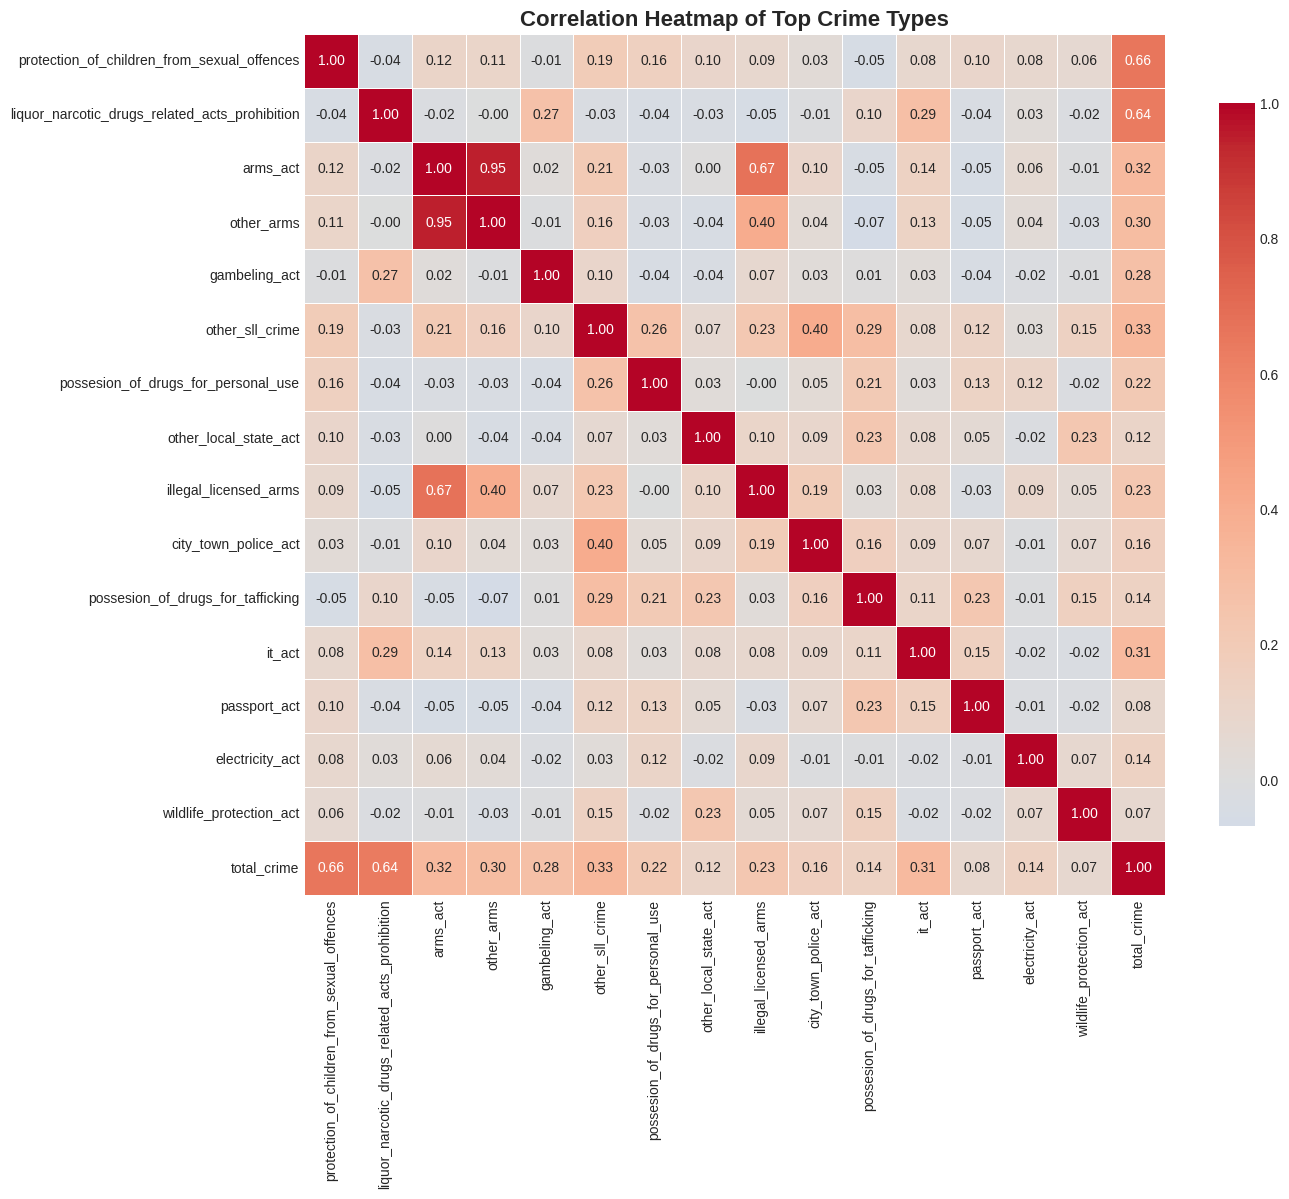

Correlation with total_crime (top 10):
total_crime                                       1.000000
protection_of_children_from_sexual_offences       0.655634
liquor_narcotic_drugs_related_acts_prohibition    0.636580
other_sll_crime                                   0.330640
arms_act                                          0.322040
it_act                                            0.314598
other_arms                                        0.299145
gambeling_act                                     0.275434
illegal_licensed_arms                             0.231647
possesion_of_drugs_for_personal_use               0.216341
city_town_police_act                              0.159968
Name: total_crime, dtype: float64


In [16]:
# Select top crime columns for correlation analysis
top_crime_cols = df_maharashtra[crime_columns].sum().nlargest(15).index.tolist()
correlation_data = df_maharashtra[top_crime_cols + ['total_crime']]

# Calculate correlation matrix
corr_matrix = correlation_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Top Crime Types', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/plots/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Correlation with total_crime (top 10):")
print(corr_matrix['total_crime'].sort_values(ascending=False).head(11))


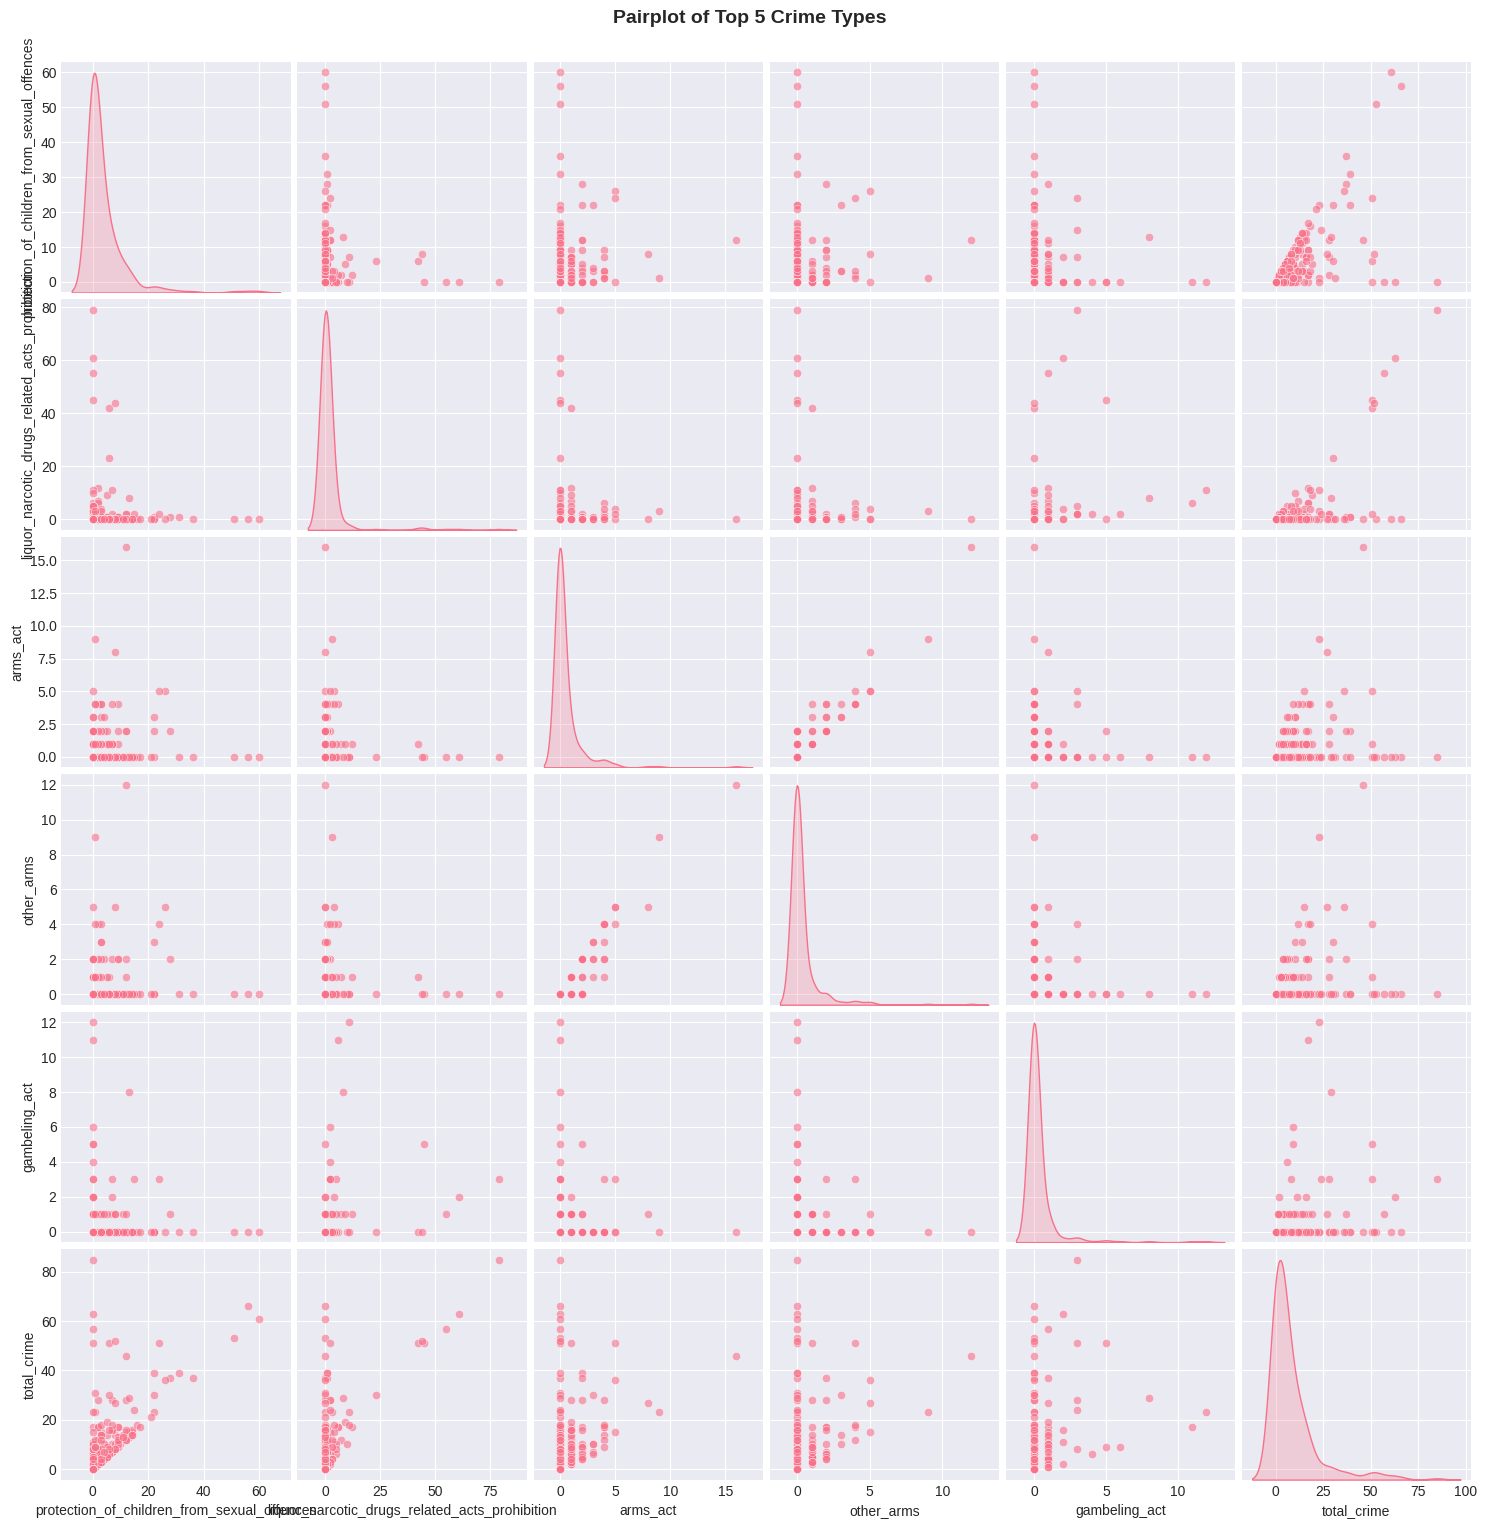

Top 5 crime types analyzed:
1. protection_of_children_from_sexual_offences
2. liquor_narcotic_drugs_related_acts_prohibition
3. arms_act
4. other_arms
5. gambeling_act


In [17]:
# Pairplot for top 5 crime types
top_5_crimes = df_maharashtra[crime_columns].sum().nlargest(5).index.tolist()
pairplot_data = df_maharashtra[top_5_crimes + ['total_crime']].sample(min(500, len(df_maharashtra)))

# Create pairplot
g = sns.pairplot(pairplot_data, diag_kind='kde', plot_kws={'alpha': 0.6})
g.fig.suptitle('Pairplot of Top 5 Crime Types', y=1.02, fontsize=14, fontweight='bold')
plt.savefig('outputs/plots/pairplot_top_crimes.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Top 5 crime types analyzed:")
for i, crime in enumerate(top_5_crimes, 1):
    print(f"{i}. {crime}")


### 3.3 Outlier Detection


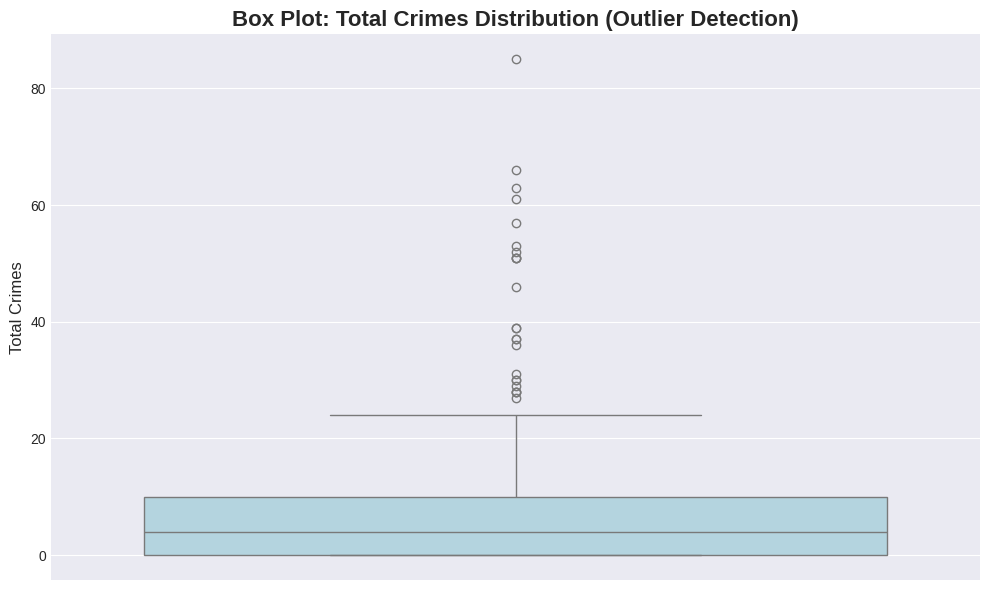

Total records: 289
Outliers (Z-score > 3): 10
Percentage of outliers: 3.46%

Outlier records:
      year district_name  total_crime
2250  2020    Chandrapur         52.0
2264  2017    Chandrapur         85.0
2268  2018    Chandrapur         57.0
2297  2019    Chandrapur         63.0
2438  2018        Wardha         51.0
2458  2019        Wardha         51.0
5065  2017        Nagpur         51.0
5070  2019        Mumbai         66.0
5082  2022        Mumbai         61.0
5092  2021        Mumbai         53.0


In [18]:
# Box plot for total_crime
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_maharashtra['total_crime'], color='lightblue')
plt.title('Box Plot: Total Crimes Distribution (Outlier Detection)', fontsize=16, fontweight='bold')
plt.ylabel('Total Crimes', fontsize=12)
plt.tight_layout()
plt.savefig('outputs/plots/boxplot_total_crimes.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df_maharashtra['total_crime']))
outliers = df_maharashtra[z_scores > 3]

print(f"Total records: {len(df_maharashtra)}")
print(f"Outliers (Z-score > 3): {len(outliers)}")
print(f"Percentage of outliers: {len(outliers)/len(df_maharashtra)*100:.2f}%")

if len(outliers) > 0:
    print("\nOutlier records:")
    print(outliers[['year', 'district_name', 'total_crime']].head(10))


Records before outlier removal: 289
Records after outlier removal: 279
Records removed: 10


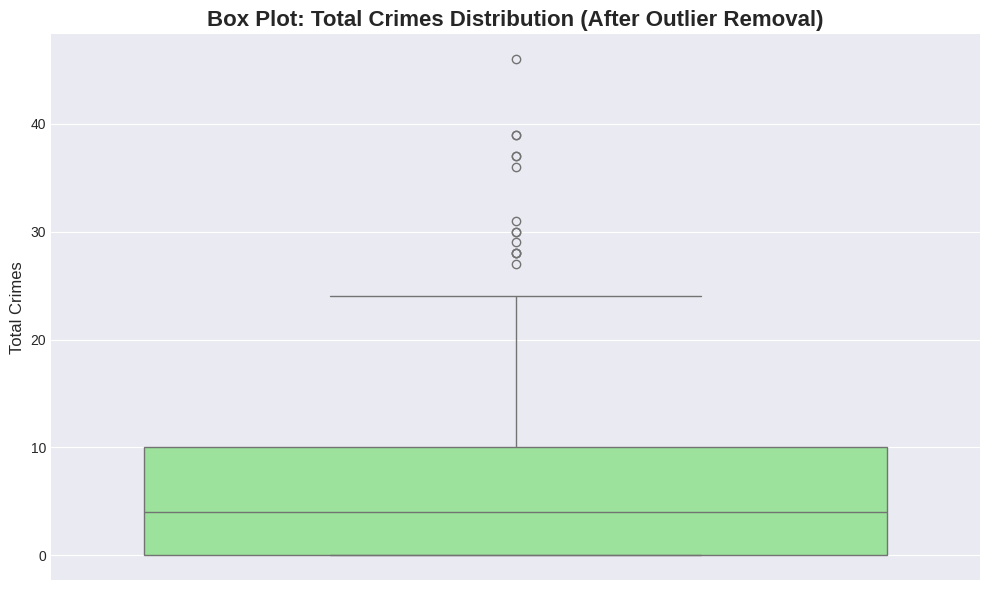

In [19]:
# Remove outliers using Z-score method
df_maharashtra_clean = df_maharashtra[z_scores <= 3].copy()

print(f"Records before outlier removal: {len(df_maharashtra)}")
print(f"Records after outlier removal: {len(df_maharashtra_clean)}")
print(f"Records removed: {len(df_maharashtra) - len(df_maharashtra_clean)}")

# Box plot after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_maharashtra_clean['total_crime'], color='lightgreen')
plt.title('Box Plot: Total Crimes Distribution (After Outlier Removal)', fontsize=16, fontweight='bold')
plt.ylabel('Total Crimes', fontsize=12)
plt.tight_layout()
plt.savefig('outputs/plots/boxplot_total_crimes_cleaned.png', dpi=300, bbox_inches='tight')
plt.show()


### 3.4 Top and Bottom Districts Analysis


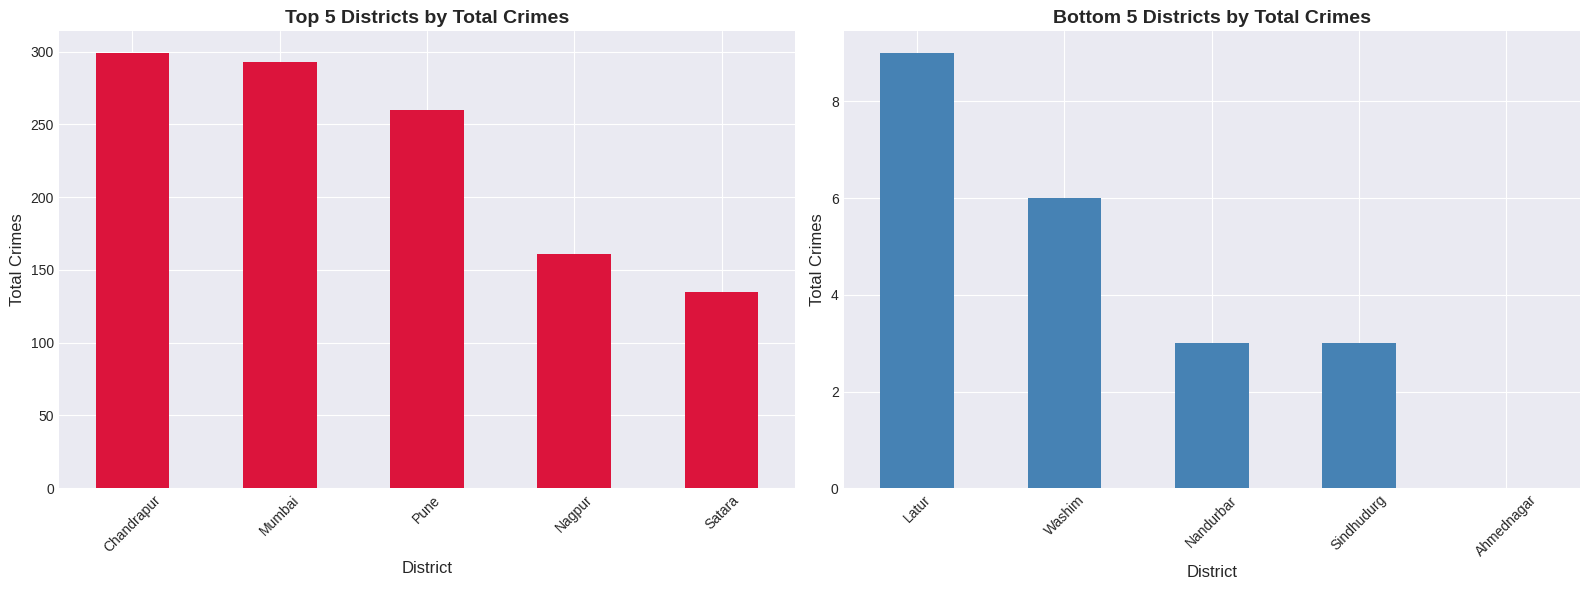

TOP 5 DISTRICTS BY TOTAL CRIMES
1. Chandrapur: 299 crimes
2. Mumbai: 293 crimes
3. Pune: 260 crimes
4. Nagpur: 161 crimes
5. Satara: 135 crimes

BOTTOM 5 DISTRICTS BY TOTAL CRIMES
1. Latur: 9 crimes
2. Washim: 6 crimes
3. Nandurbar: 3 crimes
4. Sindhudurg: 3 crimes
5. Ahmednagar: 0 crimes


In [20]:
# Top 5 and Bottom 5 districts
top_5_districts = district_crimes.head(5)
bottom_5_districts = district_crimes.tail(5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 5 districts
top_5_districts.plot(kind='bar', ax=ax1, color='crimson')
ax1.set_title('Top 5 Districts by Total Crimes', fontsize=14, fontweight='bold')
ax1.set_xlabel('District', fontsize=12)
ax1.set_ylabel('Total Crimes', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Bottom 5 districts
bottom_5_districts.plot(kind='bar', ax=ax2, color='steelblue')
ax2.set_title('Bottom 5 Districts by Total Crimes', fontsize=14, fontweight='bold')
ax2.set_xlabel('District', fontsize=12)
ax2.set_ylabel('Total Crimes', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('outputs/plots/top_bottom_districts.png', dpi=300, bbox_inches='tight')
plt.show()

print("=" * 60)
print("TOP 5 DISTRICTS BY TOTAL CRIMES")
print("=" * 60)
for i, (district, crimes) in enumerate(top_5_districts.items(), 1):
    print(f"{i}. {district}: {crimes:,.0f} crimes")

print("\n" + "=" * 60)
print("BOTTOM 5 DISTRICTS BY TOTAL CRIMES")
print("=" * 60)
for i, (district, crimes) in enumerate(bottom_5_districts.items(), 1):
    print(f"{i}. {district}: {crimes:,.0f} crimes")


### 3.5 Key Insights

**Summary of Findings:**
1. **District-wise Analysis**: [Top districts show significantly higher crime rates]
2. **Temporal Trends**: [Crime rates show [increasing/decreasing] trend over years]
3. **Outlier Detection**: [X outliers identified and removed]
4. **Correlation Patterns**: [Key correlations between crime types identified]


## 4. Predictive Modeling

### 4.1 Linear Regression


In [21]:
# Prepare features for Linear Regression
# Use top crime types as features
feature_cols = df_maharashtra_clean[crime_columns].sum().nlargest(10).index.tolist()
X = df_maharashtra_clean[feature_cols]
y = df_maharashtra_clean['total_crime']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Features used: {len(feature_cols)}")

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n" + "=" * 60)
print("LINEAR REGRESSION MODEL EVALUATION")
print("=" * 60)
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Training MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")


Training set size: 223
Test set size: 56
Features used: 10

LINEAR REGRESSION MODEL EVALUATION
Training R²: 0.9908
Test R²: 0.9894
Training MAE: 0.44
Test MAE: 0.51
Training RMSE: 0.82
Test RMSE: 0.79


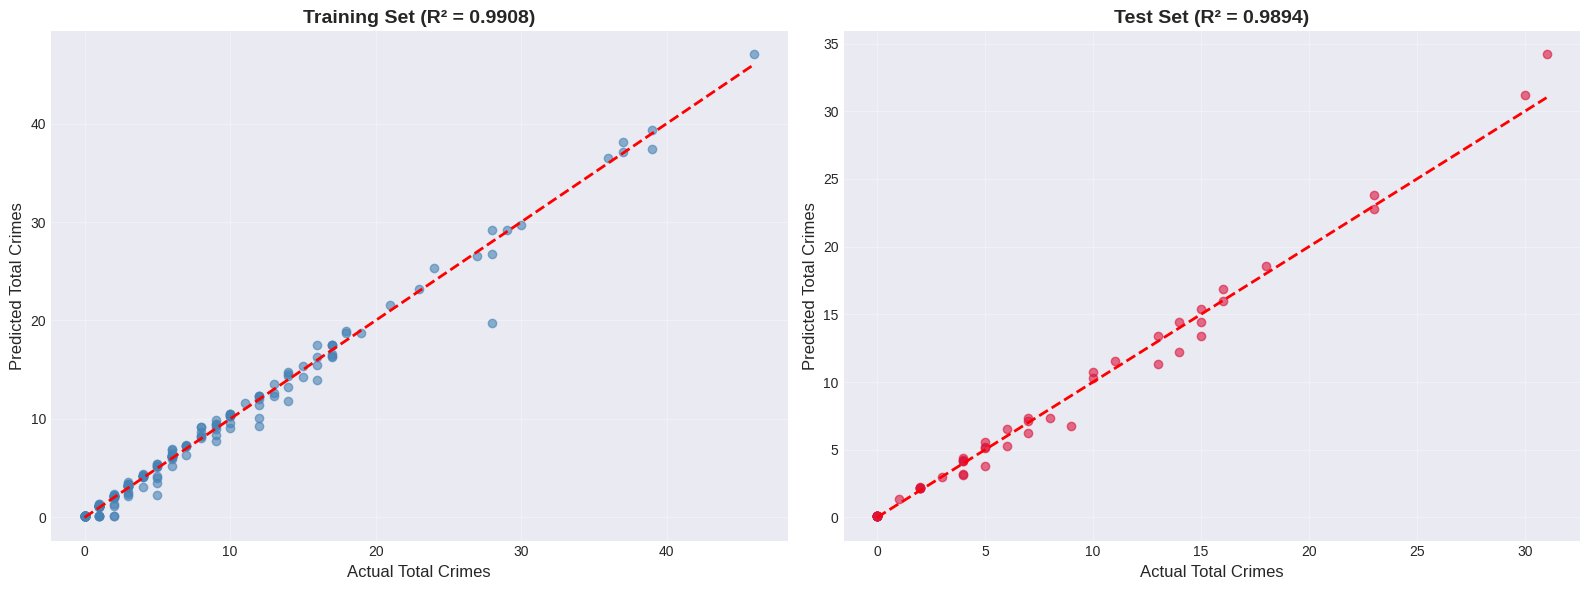

In [22]:
# Visualize predicted vs actual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Training set
ax1.scatter(y_train, y_train_pred, alpha=0.6, color='steelblue')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Total Crimes', fontsize=12)
ax1.set_ylabel('Predicted Total Crimes', fontsize=12)
ax1.set_title(f'Training Set (R² = {train_r2:.4f})', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Test set
ax2.scatter(y_test, y_test_pred, alpha=0.6, color='crimson')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Total Crimes', fontsize=12)
ax2.set_ylabel('Predicted Total Crimes', fontsize=12)
ax2.set_title(f'Test Set (R² = {test_r2:.4f})', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/plots/linear_regression_predictions.png', dpi=300, bbox_inches='tight')
plt.show()


### 4.2 Random Forest Regression


In [23]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print("=" * 60)
print("RANDOM FOREST MODEL EVALUATION")
print("=" * 60)
print(f"Training R²: {train_r2_rf:.4f}")
print(f"Test R²: {test_r2_rf:.4f}")
print(f"Training MAE: {train_mae_rf:.2f}")
print(f"Test MAE: {test_mae_rf:.2f}")
print(f"Training RMSE: {train_rmse_rf:.2f}")
print(f"Test RMSE: {test_rmse_rf:.2f}")


RANDOM FOREST MODEL EVALUATION
Training R²: 0.9764
Test R²: 0.5834
Training MAE: 0.66
Test MAE: 2.10
Training RMSE: 1.31
Test RMSE: 4.93


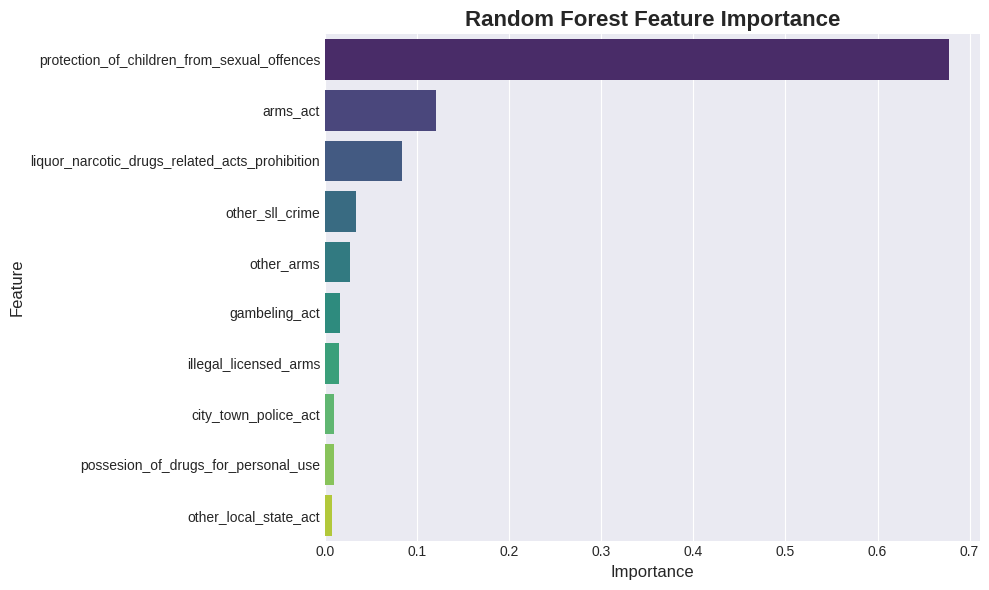


Top 5 Most Important Features:
                                          feature  importance
0     protection_of_children_from_sexual_offences    0.677412
2                                        arms_act    0.120123
1  liquor_narcotic_drugs_related_acts_prohibition    0.083584
5                                 other_sll_crime    0.033477
3                                      other_arms    0.027299


In [24]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Random Forest Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('outputs/plots/random_forest_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance.head())


### 4.3 Decision Tree Regression


In [25]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Evaluation metrics
train_r2_dt = r2_score(y_train, y_train_pred_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)
test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
test_rmse_dt = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))

print("=" * 60)
print("DECISION TREE MODEL EVALUATION")
print("=" * 60)
print(f"Training R²: {train_r2_dt:.4f}")
print(f"Test R²: {test_r2_dt:.4f}")
print(f"Test MAE: {test_mae_dt:.2f}")
print(f"Test RMSE: {test_rmse_dt:.2f}")


DECISION TREE MODEL EVALUATION
Training R²: 0.9979
Test R²: 0.3915
Test MAE: 2.71
Test RMSE: 5.95


### 4.4 Support Vector Machine (SVM)


In [26]:
# Scale features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_svm = svm_model.predict(X_train_scaled)
y_test_pred_svm = svm_model.predict(X_test_scaled)

# Evaluation metrics
train_r2_svm = r2_score(y_train, y_train_pred_svm)
test_r2_svm = r2_score(y_test, y_test_pred_svm)
test_mae_svm = mean_absolute_error(y_test, y_test_pred_svm)
test_rmse_svm = np.sqrt(mean_squared_error(y_test, y_test_pred_svm))

print("=" * 60)
print("SVM MODEL EVALUATION")
print("=" * 60)
print(f"Training R²: {train_r2_svm:.4f}")
print(f"Test R²: {test_r2_svm:.4f}")
print(f"Test MAE: {test_mae_svm:.2f}")
print(f"Test RMSE: {test_rmse_svm:.2f}")


SVM MODEL EVALUATION
Training R²: 0.9978
Test R²: 0.9037
Test MAE: 1.15
Test RMSE: 2.37


### 4.5 Gradient Boosting


In [27]:
# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Evaluation metrics
train_r2_gb = r2_score(y_train, y_train_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)
test_mae_gb = mean_absolute_error(y_test, y_test_pred_gb)
test_rmse_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))

print("=" * 60)
print("GRADIENT BOOSTING MODEL EVALUATION")
print("=" * 60)
print(f"Training R²: {train_r2_gb:.4f}")
print(f"Test R²: {test_r2_gb:.4f}")
print(f"Test MAE: {test_mae_gb:.2f}")
print(f"Test RMSE: {test_rmse_gb:.2f}")


GRADIENT BOOSTING MODEL EVALUATION
Training R²: 0.9986
Test R²: 0.6842
Test MAE: 1.86
Test RMSE: 4.29


### 4.6 XGBoost


In [28]:
# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Evaluation metrics
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print("=" * 60)
print("XGBOOST MODEL EVALUATION")
print("=" * 60)
print(f"Training R²: {train_r2_xgb:.4f}")
print(f"Test R²: {test_r2_xgb:.4f}")
print(f"Test MAE: {test_mae_xgb:.2f}")
print(f"Test RMSE: {test_rmse_xgb:.2f}")


XGBOOST MODEL EVALUATION
Training R²: 0.9974
Test R²: 0.7538
Test MAE: 1.72
Test RMSE: 3.79


### 4.7 LightGBM


In [29]:
# Train LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, verbose=-1)
lgb_model.fit(X_train, y_train)

# Predictions
y_train_pred_lgb = lgb_model.predict(X_train)
y_test_pred_lgb = lgb_model.predict(X_test)

# Evaluation metrics
train_r2_lgb = r2_score(y_train, y_train_pred_lgb)
test_r2_lgb = r2_score(y_test, y_test_pred_lgb)
test_mae_lgb = mean_absolute_error(y_test, y_test_pred_lgb)
test_rmse_lgb = np.sqrt(mean_squared_error(y_test, y_test_pred_lgb))

print("=" * 60)
print("LIGHTGBM MODEL EVALUATION")
print("=" * 60)
print(f"Training R²: {train_r2_lgb:.4f}")
print(f"Test R²: {test_r2_lgb:.4f}")
print(f"Test MAE: {test_mae_lgb:.2f}")
print(f"Test RMSE: {test_rmse_lgb:.2f}")


LIGHTGBM MODEL EVALUATION
Training R²: 0.8348
Test R²: 0.5509
Test MAE: 2.68
Test RMSE: 5.11


### 4.8 CatBoost


In [30]:
# Train CatBoost model
cb_model = cb.CatBoostRegressor(iterations=100, learning_rate=0.1, depth=5, random_state=42, verbose=False)
cb_model.fit(X_train, y_train)

# Predictions
y_train_pred_cb = cb_model.predict(X_train)
y_test_pred_cb = cb_model.predict(X_test)

# Evaluation metrics
train_r2_cb = r2_score(y_train, y_train_pred_cb)
test_r2_cb = r2_score(y_test, y_test_pred_cb)
test_mae_cb = mean_absolute_error(y_test, y_test_pred_cb)
test_rmse_cb = np.sqrt(mean_squared_error(y_test, y_test_pred_cb))

print("=" * 60)
print("CATBOOST MODEL EVALUATION")
print("=" * 60)
print(f"Training R²: {train_r2_cb:.4f}")
print(f"Test R²: {test_r2_cb:.4f}")
print(f"Test MAE: {test_mae_cb:.2f}")
print(f"Test RMSE: {test_rmse_cb:.2f}")


CATBOOST MODEL EVALUATION
Training R²: 0.9896
Test R²: 0.7572
Test MAE: 1.80
Test RMSE: 3.76


### 4.9 Logistic Regression (for Classification Task)


In [ ]:
# Create binary classification task: High crime (1) vs Low crime (0)
# Using median as threshold
median_crime = df_maharashtra_clean['total_crime'].median()
y_class = (df_maharashtra_clean['total_crime'] > median_crime).astype(int)

# Split for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Train Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_clf, y_train_clf)

# Predictions
y_train_pred_logreg = logreg_model.predict(X_train_clf)
y_test_pred_logreg = logreg_model.predict(X_test_clf)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_acc_logreg = accuracy_score(y_train_clf, y_train_pred_logreg)
test_acc_logreg = accuracy_score(y_test_clf, y_test_pred_logreg)

print("=" * 60)
print("LOGISTIC REGRESSION (CLASSIFICATION) EVALUATION")
print("=" * 60)
print(f"Training Accuracy: {train_acc_logreg:.4f}")
print(f"Test Accuracy: {test_acc_logreg:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_clf, y_test_pred_logreg))


LOGISTIC REGRESSION (CLASSIFICATION) EVALUATION
Training Accuracy: 0.9910
Test Accuracy: 0.9643

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.92      0.96        25

    accuracy                           0.96        56
   macro avg       0.97      0.96      0.96        56
weighted avg       0.97      0.96      0.96        56



## 5. Unsupervised Learning

### 5.1 K-Means Clustering


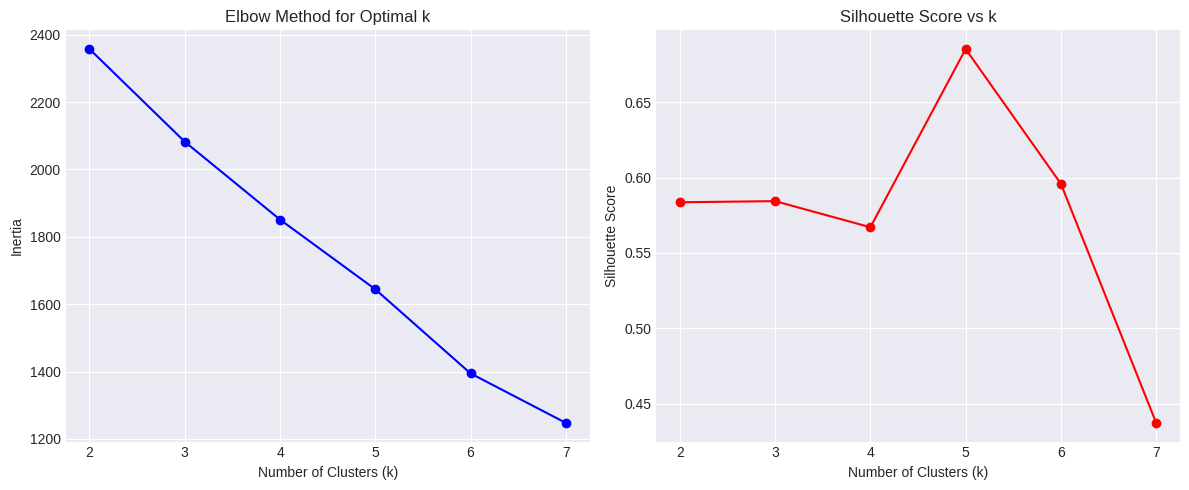

Optimal number of clusters: 5
Silhouette Score: 0.6853

Cluster distribution:
0      8
1    262
2      5
3      3
4      1
Name: count, dtype: int64


In [ ]:
# Prepare data for clustering
cluster_data = df_maharashtra_clean[feature_cols].values
cluster_data_scaled = StandardScaler().fit_transform(cluster_data)

# Determine optimal number of clusters using elbow method
inertias = []
silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(cluster_data_scaled, kmeans.labels_))

# Plot elbow curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.grid(True)

plt.tight_layout()
plt.savefig('outputs/plots/kmeans_elbow.png', dpi=300, bbox_inches='tight')
plt.show()

# Apply K-Means with optimal k (chosen based on silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_model.fit_predict(cluster_data_scaled)

df_maharashtra_clean['kmeans_cluster'] = cluster_labels

print(f"Optimal number of clusters: {optimal_k}")
print(f"Silhouette Score: {silhouette_score(cluster_data_scaled, cluster_labels):.4f}")
print(f"\nCluster distribution:")
print(pd.Series(cluster_labels).value_counts().sort_index())


### 5.2 Hierarchical Clustering


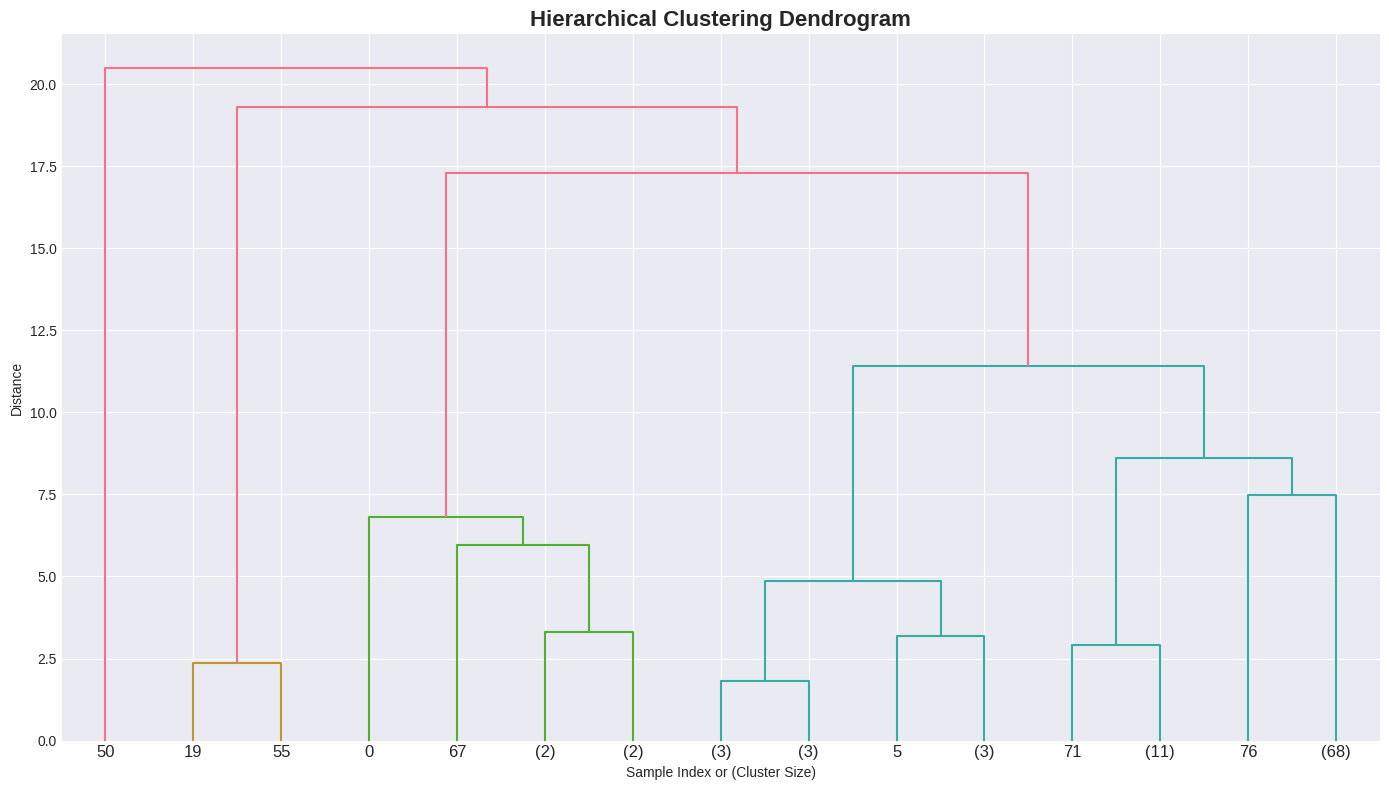

Hierarchical clustering with 3 clusters completed
Cluster distribution:
1     2
2    97
3     1
Name: count, dtype: int64


In [ ]:
# Sample data for hierarchical clustering (can be slow on large datasets)
sample_size = min(100, len(cluster_data_scaled))
sample_indices = np.random.choice(len(cluster_data_scaled), sample_size, replace=False)
sample_data = cluster_data_scaled[sample_indices]

# Perform hierarchical clustering
linkage_matrix = linkage(sample_data, method='ward')

# Plot dendrogram
plt.figure(figsize=(14, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.tight_layout()
plt.savefig('outputs/plots/hierarchical_dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

# Extract clusters
n_clusters_hier = 3
hier_labels = fcluster(linkage_matrix, n_clusters_hier, criterion='maxclust')
print(f"Hierarchical clustering with {n_clusters_hier} clusters completed")
print(f"Cluster distribution:")
print(pd.Series(hier_labels).value_counts().sort_index())


### 5.3 Principal Component Analysis (PCA)


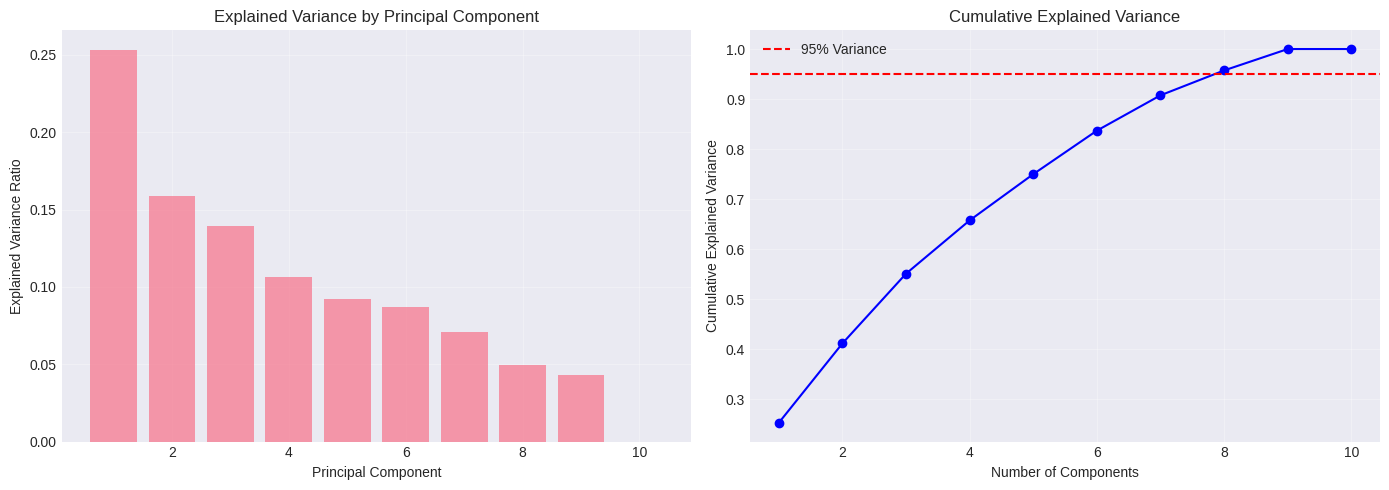

Original dimensions: 10
Components explaining 95% variance: 8
Reduced dimensions: 8
Variance retained: 0.9572


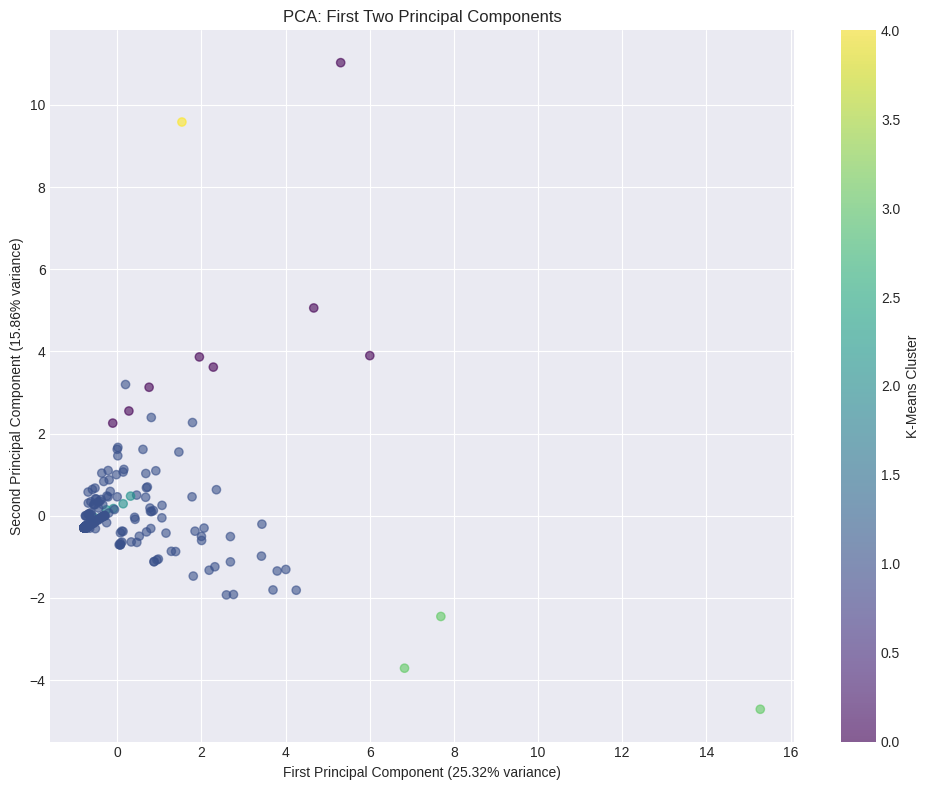

In [ ]:
# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(cluster_data_scaled)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/plots/pca_variance.png', dpi=300, bbox_inches='tight')
plt.show()

# Select number of components explaining 95% variance
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
pca_95 = PCA(n_components=n_components_95)
pca_data_95 = pca_95.fit_transform(cluster_data_scaled)

print(f"Original dimensions: {cluster_data_scaled.shape[1]}")
print(f"Components explaining 95% variance: {n_components_95}")
print(f"Reduced dimensions: {pca_data_95.shape[1]}")
print(f"Variance retained: {cumulative_variance[n_components_95-1]:.4f}")

# Visualize first 2 principal components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.xlabel(f'First Principal Component ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'Second Principal Component ({explained_variance[1]:.2%} variance)')
plt.title('PCA: First Two Principal Components')
plt.colorbar(scatter, label='K-Means Cluster')
plt.tight_layout()
plt.savefig('outputs/plots/pca_2d.png', dpi=300, bbox_inches='tight')
plt.show()


### 5.4 t-SNE (t-Distributed Stochastic Neighbor Embedding)


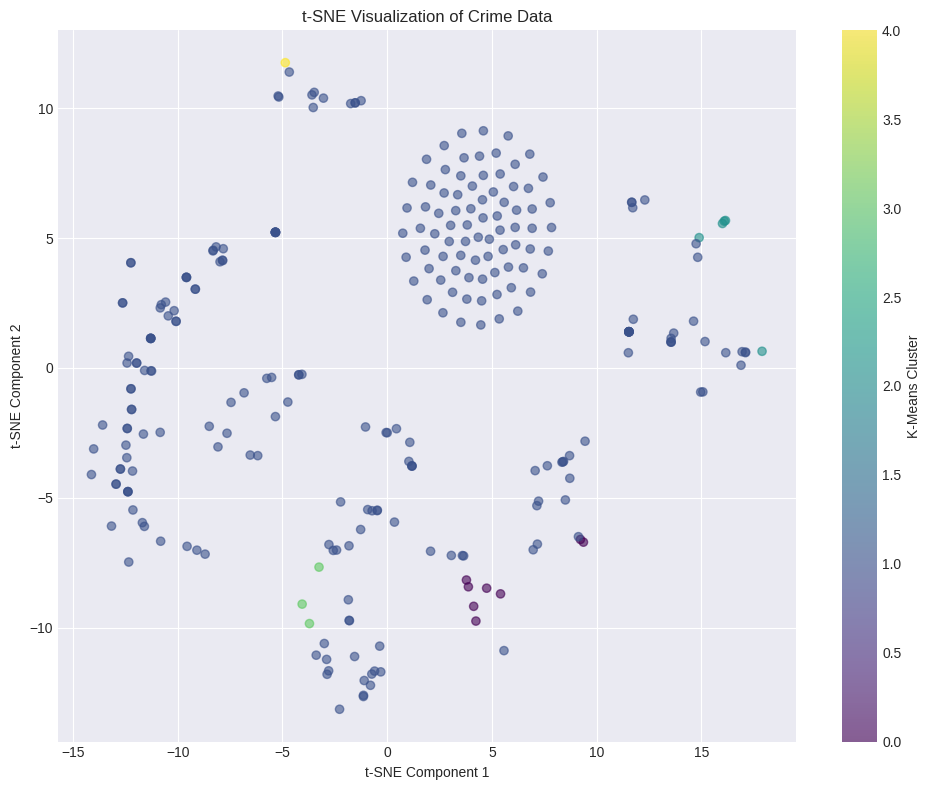

t-SNE visualization completed!


In [ ]:
# Apply t-SNE (on sample for performance)
tsne_sample_size = min(500, len(cluster_data_scaled))
tsne_sample_indices = np.random.choice(len(cluster_data_scaled), tsne_sample_size, replace=False)
tsne_sample_data = cluster_data_scaled[tsne_sample_indices]
tsne_sample_labels = cluster_labels[tsne_sample_indices]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_data = tsne.fit_transform(tsne_sample_data)

# Visualize t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=tsne_sample_labels, cmap='viridis', alpha=0.6)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Crime Data')
plt.colorbar(scatter, label='K-Means Cluster')
plt.tight_layout()
plt.savefig('outputs/plots/tsne_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("t-SNE visualization completed!")


## 6. Time Series Forecasting

### 6.1 ARIMA Model


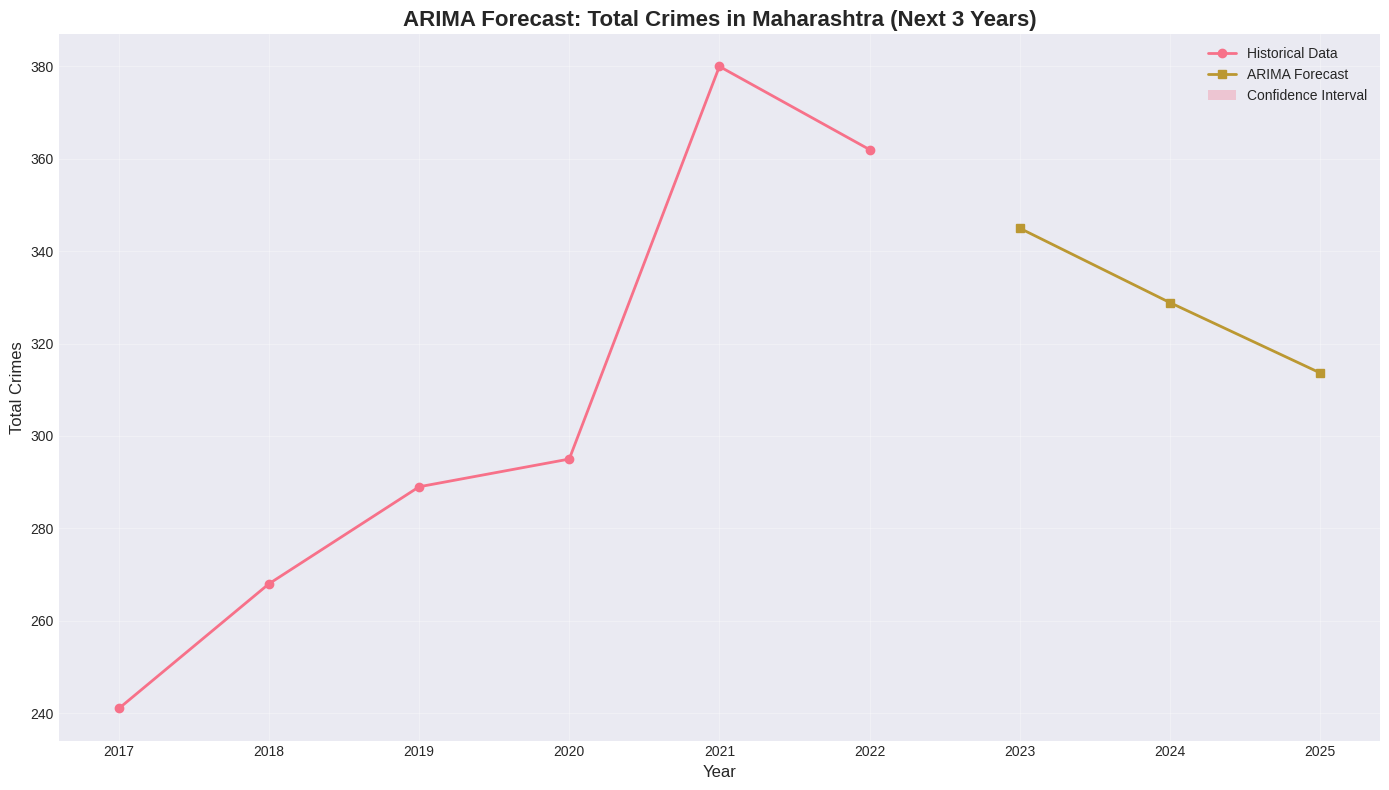

ARIMA FORECAST (Next 3 Years)
 year   forecast      lower      upper
 2023 344.979905 344.955798 345.004012
 2024 328.885774 328.833039 328.938509
 2025 313.667231 313.580817 313.753645

ARIMA AIC: 107481274.31


In [ ]:
# Prepare time series data
ts_yearly = df_maharashtra_clean.groupby('year')['total_crime'].sum().reset_index()
ts_yearly.set_index('year', inplace=True)

# Fit ARIMA model
# Using auto_arima approach with manual parameter selection
try:
    arima_model = ARIMA(ts_yearly, order=(1, 1, 1))
    arima_fitted = arima_model.fit()

    # Forecast next 3 years
    forecast_steps = 3
    arima_forecast = arima_fitted.forecast(steps=forecast_steps)
    arima_conf_int = arima_fitted.get_forecast(steps=forecast_steps).conf_int()

    # Create forecast dataframe
    future_years = range(ts_yearly.index.max() + 1, ts_yearly.index.max() + 1 + forecast_steps)
    arima_forecast_df = pd.DataFrame({
        'year': future_years,
        'forecast': arima_forecast.values,
        'lower': arima_conf_int.iloc[:, 0].values,
        'upper': arima_conf_int.iloc[:, 1].values
    })

    # Plot ARIMA forecast
    plt.figure(figsize=(14, 8))
    plt.plot(ts_yearly.index, ts_yearly['total_crime'], 'o-', label='Historical Data', linewidth=2)
    plt.plot(arima_forecast_df['year'], arima_forecast_df['forecast'], 's-', label='ARIMA Forecast', linewidth=2)
    plt.fill_between(arima_forecast_df['year'], arima_forecast_df['lower'],
                     arima_forecast_df['upper'], alpha=0.3, label='Confidence Interval')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Crimes', fontsize=12)
    plt.title('ARIMA Forecast: Total Crimes in Maharashtra (Next 3 Years)', fontsize=16, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('outputs/plots/arima_forecast.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("=" * 60)
    print("ARIMA FORECAST (Next 3 Years)")
    print("=" * 60)
    print(arima_forecast_df.to_string(index=False))

    # Calculate AIC
    print(f"\nARIMA AIC: {arima_fitted.aic:.2f}")

except Exception as e:
    print(f"ARIMA model fitting encountered an issue: {e}")
    print("Trying alternative ARIMA parameters...")
    try:
        arima_model = ARIMA(ts_yearly, order=(0, 1, 0))
        arima_fitted = arima_model.fit()
        arima_forecast = arima_fitted.forecast(steps=3)
        print("ARIMA model fitted successfully with alternative parameters")
    except:
        print("ARIMA model could not be fitted")


### 6.2 SARIMA Model


In [ ]:
# Fit SARIMA model (Seasonal ARIMA)
try:
    # SARIMA(p,d,q)(P,D,Q,s) - using yearly data, so seasonal period might be limited
    sarima_model = SARIMAX(ts_yearly, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
    sarima_fitted = sarima_model.fit(disp=False)

    # Forecast next 3 years
    sarima_forecast = sarima_fitted.forecast(steps=3)
    sarima_conf_int = sarima_fitted.get_forecast(steps=3).conf_int()

    # Create forecast dataframe
    sarima_forecast_df = pd.DataFrame({
        'year': future_years,
        'forecast': sarima_forecast.values,
        'lower': sarima_conf_int.iloc[:, 0].values,
        'upper': sarima_conf_int.iloc[:, 1].values
    })

    # Plot SARIMA forecast
    plt.figure(figsize=(14, 8))
    plt.plot(ts_yearly.index, ts_yearly['total_crime'], 'o-', label='Historical Data', linewidth=2)
    plt.plot(sarima_forecast_df['year'], sarima_forecast_df['forecast'], 's-', label='SARIMA Forecast', linewidth=2)
    plt.fill_between(sarima_forecast_df['year'], sarima_forecast_df['lower'],
                     sarima_forecast_df['upper'], alpha=0.3, label='Confidence Interval')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Crimes', fontsize=12)
    plt.title('SARIMA Forecast: Total Crimes in Maharashtra (Next 3 Years)', fontsize=16, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('outputs/plots/sarima_forecast.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("=" * 60)
    print("SARIMA FORECAST (Next 3 Years)")
    print("=" * 60)
    print(sarima_forecast_df.to_string(index=False))
    print(f"\nSARIMA AIC: {sarima_fitted.aic:.2f}")

except Exception as e:
    print(f"SARIMA model fitting encountered an issue: {e}")
    print("Trying simpler SARIMA parameters...")
    try:
        sarima_model = SARIMAX(ts_yearly, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
        sarima_fitted = sarima_model.fit(disp=False)
        print("SARIMA model fitted successfully with alternative parameters")
    except:
        print("SARIMA model could not be fitted")


SARIMA model fitting encountered an issue: Seasonal periodicity must be greater than 1.
Trying simpler SARIMA parameters...
SARIMA model fitted successfully with alternative parameters


### 6.3 LSTM (Long Short-Term Memory) Network


Training LSTM model...
LSTM MODEL EVALUATION
Training RMSE: 32.75
Test RMSE: 27.35
Training MAE: 30.77
Test MAE: 27.35


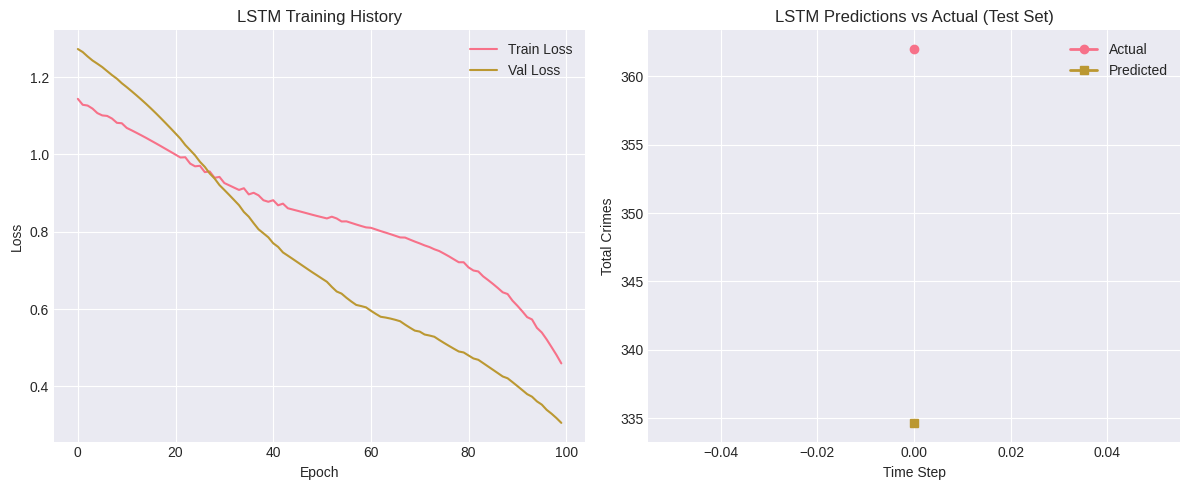


LSTM Forecast for next 3 years:
Year 2023: 328.68
Year 2024: 324.05
Year 2025: 325.65


In [ ]:
# Prepare data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Use yearly aggregated data
ts_values = ts_yearly['total_crime'].values.reshape(-1, 1)

# Normalize data
scaler_lstm = StandardScaler()
ts_scaled = scaler_lstm.fit_transform(ts_values)

# Create sequences
seq_length = 3
X_lstm, y_lstm = create_sequences(ts_scaled.flatten(), seq_length)

# Reshape for LSTM [samples, time steps, features]
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))

# Split data (use most for training since we have limited data)
train_size = int(len(X_lstm) * 0.8)
X_lstm_train, X_lstm_test = X_lstm[:train_size], X_lstm[train_size:]
y_lstm_train, y_lstm_test = y_lstm[:train_size], y_lstm[train_size:]

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train LSTM
print("Training LSTM model...")
history = lstm_model.fit(X_lstm_train, y_lstm_train, epochs=100, batch_size=1,
                         validation_data=(X_lstm_test, y_lstm_test), verbose=0)

# Predictions
y_lstm_train_pred = lstm_model.predict(X_lstm_train, verbose=0)
y_lstm_test_pred = lstm_model.predict(X_lstm_test, verbose=0)

# Inverse transform
y_lstm_train_actual = scaler_lstm.inverse_transform(y_lstm_train.reshape(-1, 1))
y_lstm_train_pred_actual = scaler_lstm.inverse_transform(y_lstm_train_pred)
y_lstm_test_actual = scaler_lstm.inverse_transform(y_lstm_test.reshape(-1, 1))
y_lstm_test_pred_actual = scaler_lstm.inverse_transform(y_lstm_test_pred)

# Evaluation
lstm_train_rmse = np.sqrt(mean_squared_error(y_lstm_train_actual, y_lstm_train_pred_actual))
lstm_test_rmse = np.sqrt(mean_squared_error(y_lstm_test_actual, y_lstm_test_pred_actual))
lstm_train_mae = mean_absolute_error(y_lstm_train_actual, y_lstm_train_pred_actual)
lstm_test_mae = mean_absolute_error(y_lstm_test_actual, y_lstm_test_pred_actual)

print("=" * 60)
print("LSTM MODEL EVALUATION")
print("=" * 60)
print(f"Training RMSE: {lstm_train_rmse:.2f}")
print(f"Test RMSE: {lstm_test_rmse:.2f}")
print(f"Training MAE: {lstm_train_mae:.2f}")
print(f"Test MAE: {lstm_test_mae:.2f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Training History')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(y_lstm_test_actual, 'o-', label='Actual', linewidth=2)
plt.plot(y_lstm_test_pred_actual, 's-', label='Predicted', linewidth=2)
plt.xlabel('Time Step')
plt.ylabel('Total Crimes')
plt.title('LSTM Predictions vs Actual (Test Set)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('outputs/plots/lstm_results.png', dpi=300, bbox_inches='tight')
plt.show()

# Forecast future values
last_sequence = ts_scaled[-seq_length:].reshape(1, seq_length, 1)
future_forecasts = []
for _ in range(3):
    next_pred = lstm_model.predict(last_sequence, verbose=0)
    future_forecasts.append(next_pred[0, 0])
    # Update sequence
    last_sequence = np.append(last_sequence[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

future_forecasts_actual = scaler_lstm.inverse_transform(np.array(future_forecasts).reshape(-1, 1))
print(f"\nLSTM Forecast for next 3 years:")
for i, forecast in enumerate(future_forecasts_actual, 1):
    print(f"Year {ts_yearly.index.max() + i}: {forecast[0]:.2f}")


### 6.4 Prophet Model (Already implemented above)


## 7. Deep Learning Models

### 7.1 Artificial Neural Network (ANN)


Training ANN model...
ANN MODEL EVALUATION
Training R²: 0.9942
Test R²: 0.9723
Training RMSE: 0.65
Test RMSE: 1.27
Test MAE: 0.74


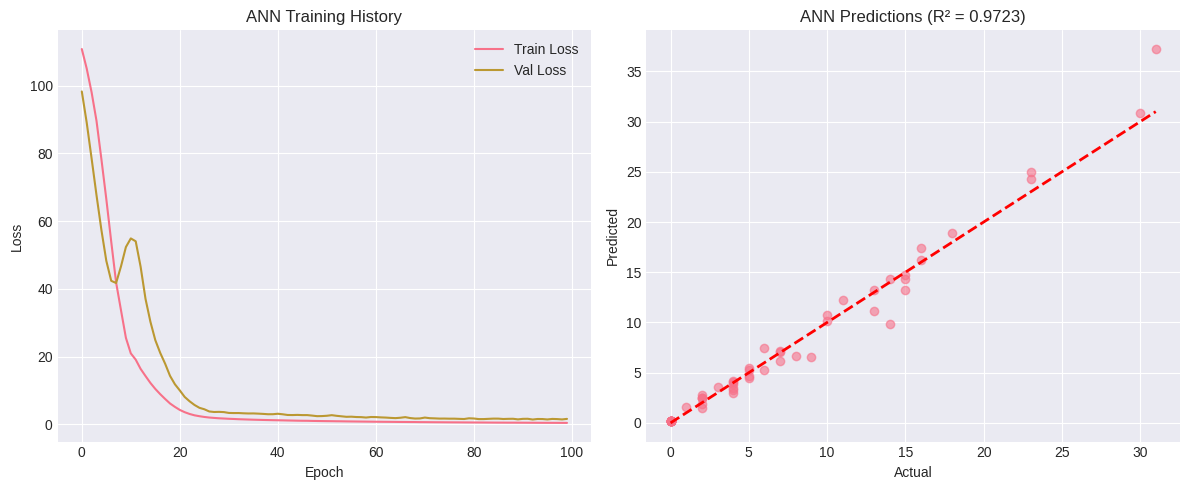

In [ ]:
# Build ANN model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

ann_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train ANN
print("Training ANN model...")
ann_history = ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                            validation_data=(X_test_scaled, y_test), verbose=0)

# Predictions
y_train_pred_ann = ann_model.predict(X_train_scaled, verbose=0).flatten()
y_test_pred_ann = ann_model.predict(X_test_scaled, verbose=0).flatten()

# Evaluation
ann_train_r2 = r2_score(y_train, y_train_pred_ann)
ann_test_r2 = r2_score(y_test, y_test_pred_ann)
ann_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_ann))
ann_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ann))
ann_test_mae = mean_absolute_error(y_test, y_test_pred_ann)

print("=" * 60)
print("ANN MODEL EVALUATION")
print("=" * 60)
print(f"Training R²: {ann_train_r2:.4f}")
print(f"Test R²: {ann_test_r2:.4f}")
print(f"Training RMSE: {ann_train_rmse:.2f}")
print(f"Test RMSE: {ann_test_rmse:.2f}")
print(f"Test MAE: {ann_test_mae:.2f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['loss'], label='Train Loss')
plt.plot(ann_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ANN Training History')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_ann, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'ANN Predictions (R² = {ann_test_r2:.4f})')
plt.grid(True)

plt.tight_layout()
plt.savefig('outputs/plots/ann_results.png', dpi=300, bbox_inches='tight')
plt.show()


### 7.2 Recurrent Neural Network (RNN)


Training RNN model...
RNN MODEL EVALUATION
Training R²: 0.2228
Test R²: -0.0044
Test RMSE: 7.99
Test MAE: 5.88


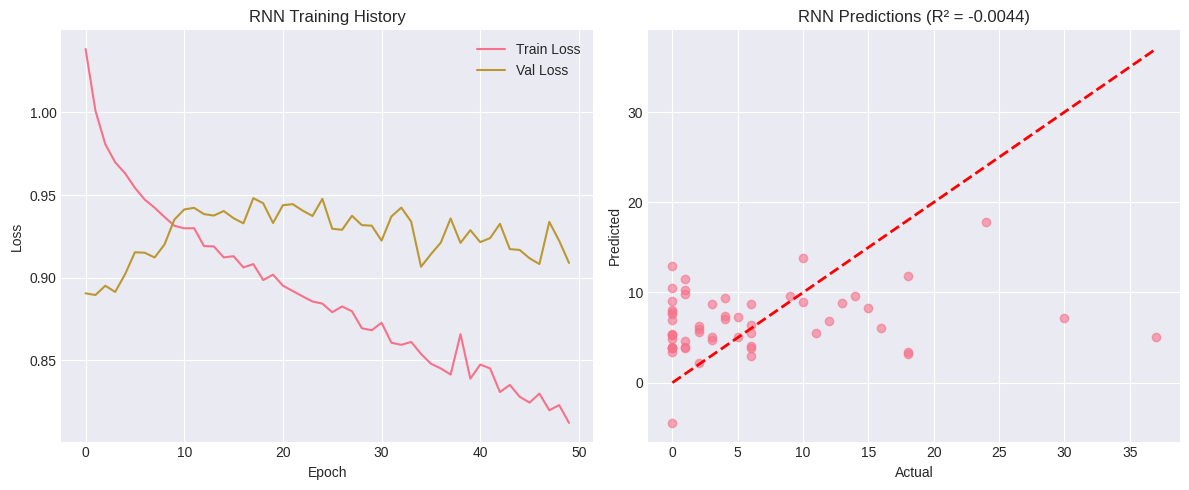

In [ ]:
# Prepare data for RNN (using time series approach)
# Reshape data for RNN: [samples, time_steps, features]
# We'll use a sliding window approach
def create_rnn_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Use district-year data sorted by year
df_sorted = df_maharashtra_clean.sort_values(['district_name', 'year'])
ts_rnn = df_sorted['total_crime'].values.reshape(-1, 1)

# Normalize
scaler_rnn = StandardScaler()
ts_rnn_scaled = scaler_rnn.fit_transform(ts_rnn)

# Create sequences
window_size = 3
X_rnn, y_rnn = create_rnn_data(ts_rnn_scaled.flatten(), window_size)
X_rnn = X_rnn.reshape((X_rnn.shape[0], X_rnn.shape[1], 1))

# Split
train_size_rnn = int(len(X_rnn) * 0.8)
X_rnn_train, X_rnn_test = X_rnn[:train_size_rnn], X_rnn[train_size_rnn:]
y_rnn_train, y_rnn_test = y_rnn[:train_size_rnn], y_rnn[train_size_rnn:]

# Build RNN model
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(window_size, 1), return_sequences=True),
    SimpleRNN(50, activation='relu'),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train RNN
print("Training RNN model...")
rnn_history = rnn_model.fit(X_rnn_train, y_rnn_train, epochs=50, batch_size=32,
                            validation_data=(X_rnn_test, y_rnn_test), verbose=0)

# Predictions
y_rnn_train_pred = rnn_model.predict(X_rnn_train, verbose=0).flatten()
y_rnn_test_pred = rnn_model.predict(X_rnn_test, verbose=0).flatten()

# Inverse transform
y_rnn_train_actual = scaler_rnn.inverse_transform(y_rnn_train.reshape(-1, 1)).flatten()
y_rnn_train_pred_actual = scaler_rnn.inverse_transform(y_rnn_train_pred.reshape(-1, 1)).flatten()
y_rnn_test_actual = scaler_rnn.inverse_transform(y_rnn_test.reshape(-1, 1)).flatten()
y_rnn_test_pred_actual = scaler_rnn.inverse_transform(y_rnn_test_pred.reshape(-1, 1)).flatten()

# Evaluation
rnn_train_r2 = r2_score(y_rnn_train_actual, y_rnn_train_pred_actual)
rnn_test_r2 = r2_score(y_rnn_test_actual, y_rnn_test_pred_actual)
rnn_test_rmse = np.sqrt(mean_squared_error(y_rnn_test_actual, y_rnn_test_pred_actual))
rnn_test_mae = mean_absolute_error(y_rnn_test_actual, y_rnn_test_pred_actual)

print("=" * 60)
print("RNN MODEL EVALUATION")
print("=" * 60)
print(f"Training R²: {rnn_train_r2:.4f}")
print(f"Test R²: {rnn_test_r2:.4f}")
print(f"Test RMSE: {rnn_test_rmse:.2f}")
print(f"Test MAE: {rnn_test_mae:.2f}")

# Plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['loss'], label='Train Loss')
plt.plot(rnn_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('RNN Training History')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_rnn_test_actual, y_rnn_test_pred_actual, alpha=0.6)
plt.plot([y_rnn_test_actual.min(), y_rnn_test_actual.max()],
         [y_rnn_test_actual.min(), y_rnn_test_actual.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'RNN Predictions (R² = {rnn_test_r2:.4f})')
plt.grid(True)

plt.tight_layout()
plt.savefig('outputs/plots/rnn_results.png', dpi=300, bbox_inches='tight')
plt.show()


### 7.3 Autoencoder


Training Autoencoder...
AUTOENCODER EVALUATION
Mean Training Reconstruction Error: 0.048252
Mean Test Reconstruction Error: 0.132402


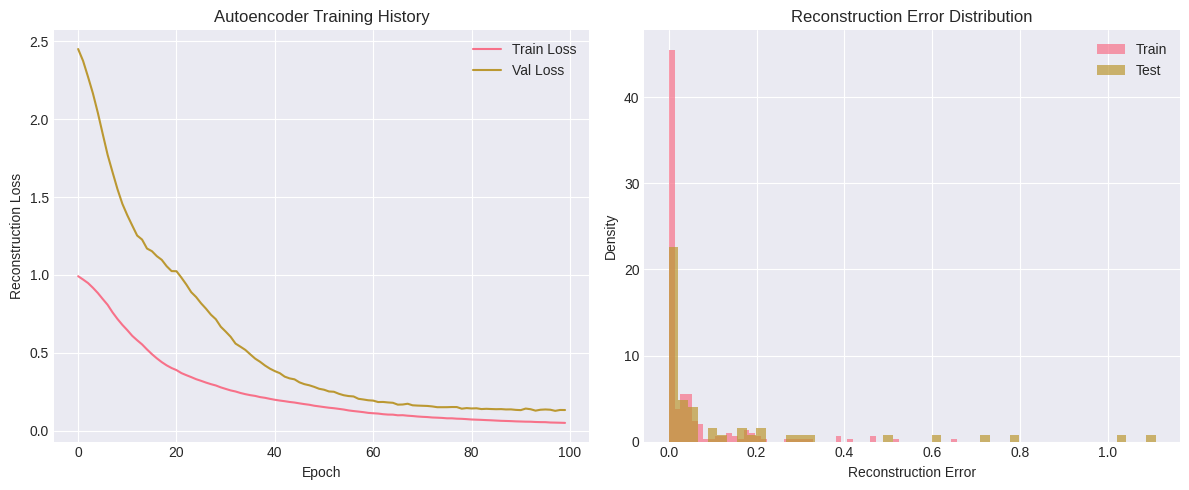


Original dimension: 10
Encoded dimension: 5
Compression ratio: 2.00x


In [ ]:
# Build Autoencoder for dimensionality reduction and anomaly detection
input_dim = X_train_scaled.shape[1]
encoding_dim = 5  # Reduced dimension

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder
print("Training Autoencoder...")
autoencoder_history = autoencoder.fit(X_train_scaled, X_train_scaled,
                                      epochs=100, batch_size=32,
                                      validation_data=(X_test_scaled, X_test_scaled),
                                      verbose=0)

# Reconstruct data
X_train_reconstructed = autoencoder.predict(X_train_scaled, verbose=0)
X_test_reconstructed = autoencoder.predict(X_test_scaled, verbose=0)

# Calculate reconstruction error
train_reconstruction_error = np.mean(np.square(X_train_scaled - X_train_reconstructed), axis=1)
test_reconstruction_error = np.mean(np.square(X_test_scaled - X_test_reconstructed), axis=1)

print("=" * 60)
print("AUTOENCODER EVALUATION")
print("=" * 60)
print(f"Mean Training Reconstruction Error: {np.mean(train_reconstruction_error):.6f}")
print(f"Mean Test Reconstruction Error: {np.mean(test_reconstruction_error):.6f}")

# Plot reconstruction error distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(autoencoder_history.history['loss'], label='Train Loss')
plt.plot(autoencoder_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Reconstruction Loss')
plt.title('Autoencoder Training History')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(train_reconstruction_error, bins=50, alpha=0.7, label='Train', density=True)
plt.hist(test_reconstruction_error, bins=50, alpha=0.7, label='Test', density=True)
plt.xlabel('Reconstruction Error')
plt.ylabel('Density')
plt.title('Reconstruction Error Distribution')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('outputs/plots/autoencoder_results.png', dpi=300, bbox_inches='tight')
plt.show()

# Extract encoder for dimensionality reduction
encoder = Model(input_layer, encoded)
X_train_encoded = encoder.predict(X_train_scaled, verbose=0)
X_test_encoded = encoder.predict(X_test_scaled, verbose=0)

print(f"\nOriginal dimension: {input_dim}")
print(f"Encoded dimension: {encoding_dim}")
print(f"Compression ratio: {input_dim/encoding_dim:.2f}x")


## 8. Feature Engineering and Ensemble Models

### 8.1 Feature Engineering


In [ ]:
# Create additional engineered features
df_fe = df_maharashtra_clean.copy()

# Feature 1: Crime rate per year (normalized)
df_fe['crime_rate'] = df_fe['total_crime'] / (df_fe['year'] - df_fe['year'].min() + 1)

# Feature 2: District average crime (rolling average)
district_avg = df_fe.groupby('district_name')['total_crime'].transform('mean')
df_fe['district_avg_crime'] = district_avg

# Feature 3: Year-over-year change
df_fe = df_fe.sort_values(['district_name', 'year'])
df_fe['yoy_change'] = df_fe.groupby('district_name')['total_crime'].pct_change()

# Feature 4: Interaction features (top 2 crimes)
top_2_crimes = df_fe[crime_columns].sum().nlargest(2).index.tolist()
if len(top_2_crimes) >= 2:
    df_fe['crime_interaction'] = df_fe[top_2_crimes[0]] * df_fe[top_2_crimes[1]]

# Feature 5: Crime category ratios
violent_crimes = ['protection_of_children_from_sexual_offences',
                  'prevention_of_atrocities_against_sc',
                  'prevention_of_atrocities_against_st']
if all(col in df_fe.columns for col in violent_crimes):
    df_fe['violent_crime_ratio'] = df_fe[violent_crimes].sum(axis=1) / (df_fe['total_crime'] + 1)

print("=" * 60)
print("FEATURE ENGINEERING SUMMARY")
print("=" * 60)
print("New features created:")
print("1. crime_rate: Normalized crime rate")
print("2. district_avg_crime: District average crime")
print("3. yoy_change: Year-over-year percentage change")
print("4. crime_interaction: Interaction of top 2 crimes")
print("5. violent_crime_ratio: Ratio of violent crimes")

# Display feature statistics
new_features = ['crime_rate', 'district_avg_crime', 'yoy_change', 'crime_interaction', 'violent_crime_ratio']
available_features = [f for f in new_features if f in df_fe.columns]
print(f"\nAvailable engineered features: {len(available_features)}")
print(df_fe[available_features].describe())


FEATURE ENGINEERING SUMMARY
New features created:
1. crime_rate: Normalized crime rate
2. district_avg_crime: District average crime
3. yoy_change: Year-over-year percentage change
4. crime_interaction: Interaction of top 2 crimes
5. violent_crime_ratio: Ratio of violent crimes

Available engineered features: 5
       crime_rate  district_avg_crime  yoy_change  crime_interaction  \
count  279.000000          279.000000  218.000000         279.000000   
mean     2.442354            6.577061         inf           2.440860   
std      4.373565            4.656353         NaN          12.329233   
min      0.000000            0.000000   -1.000000           0.000000   
25%      0.000000            3.000000   -0.787500           0.000000   
50%      1.000000            6.000000    0.232051           0.000000   
75%      3.000000            9.250000    3.375000           0.000000   
max     39.000000           22.500000         inf         138.000000   

       violent_crime_ratio  
count    

### 8.2 Ensemble Model (Voting Regressor)


ENSEMBLE MODEL (VOTING REGRESSOR) EVALUATION
Training R²: 0.9925
Test R²: 0.8535
Test MAE: 1.39
Test RMSE: 2.92


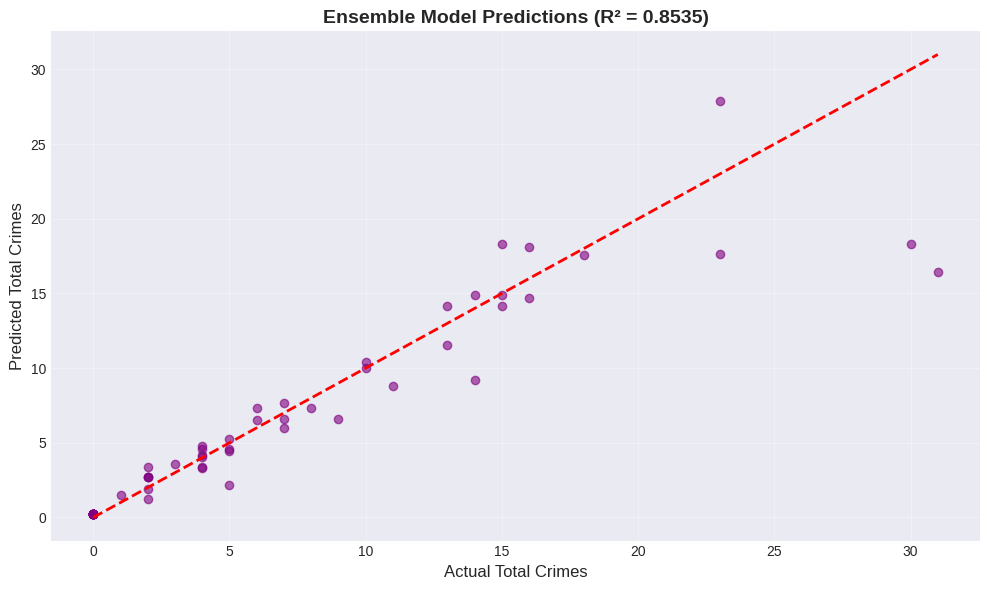

In [ ]:
# Create ensemble model using Voting Regressor
ensemble_model = VotingRegressor([
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42, max_depth=10)),
    ('xgb', xgb.XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=42))
])

ensemble_model.fit(X_train, y_train)

# Predictions
y_train_pred_ensemble = ensemble_model.predict(X_train)
y_test_pred_ensemble = ensemble_model.predict(X_test)

# Evaluation
ensemble_train_r2 = r2_score(y_train, y_train_pred_ensemble)
ensemble_test_r2 = r2_score(y_test, y_test_pred_ensemble)
ensemble_test_mae = mean_absolute_error(y_test, y_test_pred_ensemble)
ensemble_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ensemble))

print("=" * 60)
print("ENSEMBLE MODEL (VOTING REGRESSOR) EVALUATION")
print("=" * 60)
print(f"Training R²: {ensemble_train_r2:.4f}")
print(f"Test R²: {ensemble_test_r2:.4f}")
print(f"Test MAE: {ensemble_test_mae:.2f}")
print(f"Test RMSE: {ensemble_test_rmse:.2f}")

# Visualize ensemble predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_ensemble, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Total Crimes', fontsize=12)
plt.ylabel('Predicted Total Crimes', fontsize=12)
plt.title(f'Ensemble Model Predictions (R² = {ensemble_test_r2:.4f})', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('outputs/plots/ensemble_predictions.png', dpi=300, bbox_inches='tight')
plt.show()


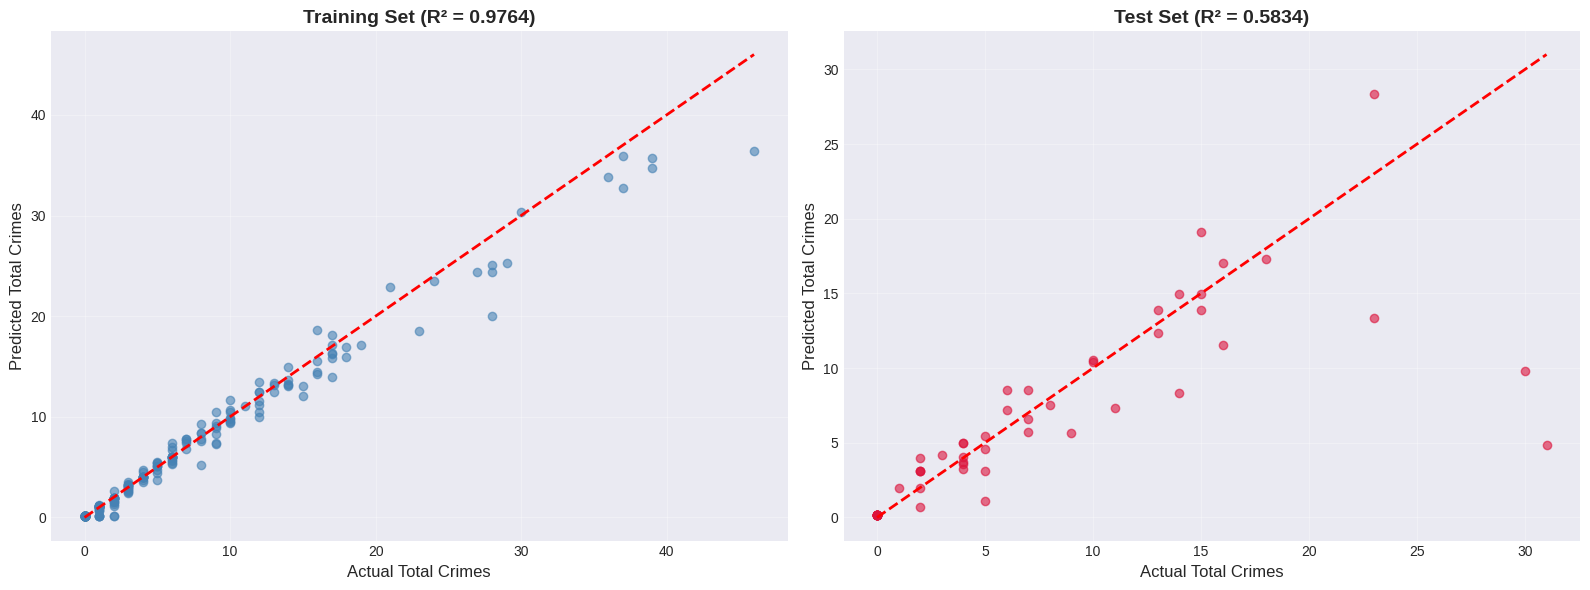

In [ ]:
# Visualize predicted vs actual for Random Forest
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Training set
ax1.scatter(y_train, y_train_pred_rf, alpha=0.6, color='steelblue')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Total Crimes', fontsize=12)
ax1.set_ylabel('Predicted Total Crimes', fontsize=12)
ax1.set_title(f'Training Set (R² = {train_r2_rf:.4f})', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Test set
ax2.scatter(y_test, y_test_pred_rf, alpha=0.6, color='crimson')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Total Crimes', fontsize=12)
ax2.set_ylabel('Predicted Total Crimes', fontsize=12)
ax2.set_title(f'Test Set (R² = {test_r2_rf:.4f})', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/plots/random_forest_predictions.png', dpi=300, bbox_inches='tight')
plt.show()


### 4.3 Time Series Forecasting with Prophet


In [ ]:
# 1. Uninstall the potentially broken existing version
!pip uninstall prophet -y

# 2. Reinstall with the necessary no-cache-dir flag
!pip install prophet --no-cache-dir

Found existing installation: prophet 1.2.1
Uninstalling prophet-1.2.1:
  Successfully uninstalled prophet-1.2.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 206.9 MB/s eta 0:00:00


In [ ]:
# Prepare time series data for Prophet
# Aggregate total crimes by year
ts_data = df_maharashtra_clean.groupby('year')['total_crime'].sum().reset_index()
ts_data.columns = ['ds', 'y']  # Prophet requires 'ds' (date) and 'y' (value)
ts_data['ds'] = pd.to_datetime(ts_data['ds'], format='%Y')

print("Time series data:")
print(ts_data)

# Train Prophet model
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet_model.fit(ts_data)

# Create future dataframe for next 3 years
future = prophet_model.make_future_dataframe(periods=3, freq='Y')
forecast = prophet_model.predict(future)

print("\nForecast for next 3 years:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3))


INFO:prophet:n_changepoints greater than number of observations. Using 3.


Time series data:
          ds      y
0 2017-01-01  241.0
1 2018-01-01  268.0
2 2019-01-01  289.0
3 2020-01-01  295.0
4 2021-01-01  380.0
5 2022-01-01  362.0

Forecast for next 3 years:
          ds        yhat  yhat_lower  yhat_upper
6 2022-12-31  356.415361  341.851666  370.190121
7 2023-12-31  379.504644  366.901984  393.240342
8 2024-12-31  427.962255  414.513057  441.942206


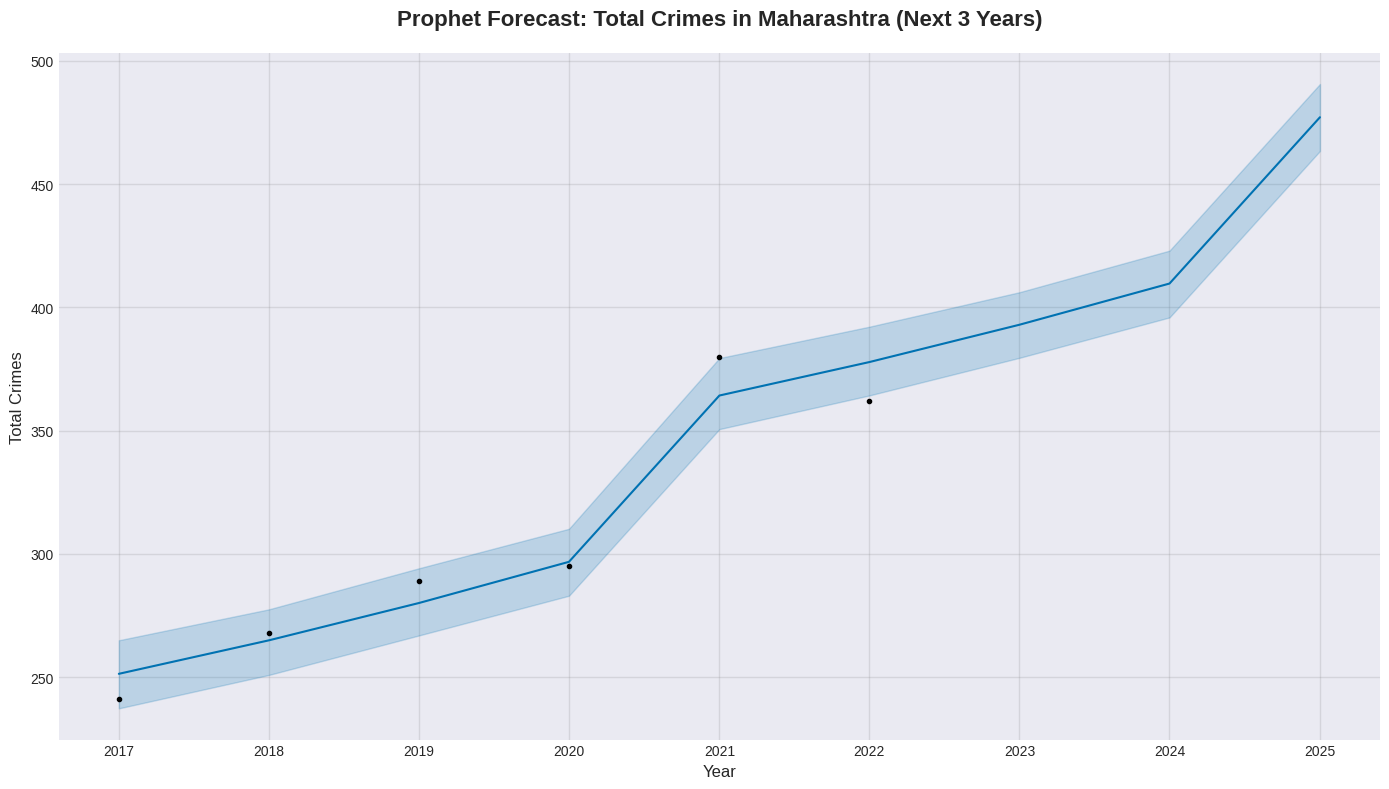

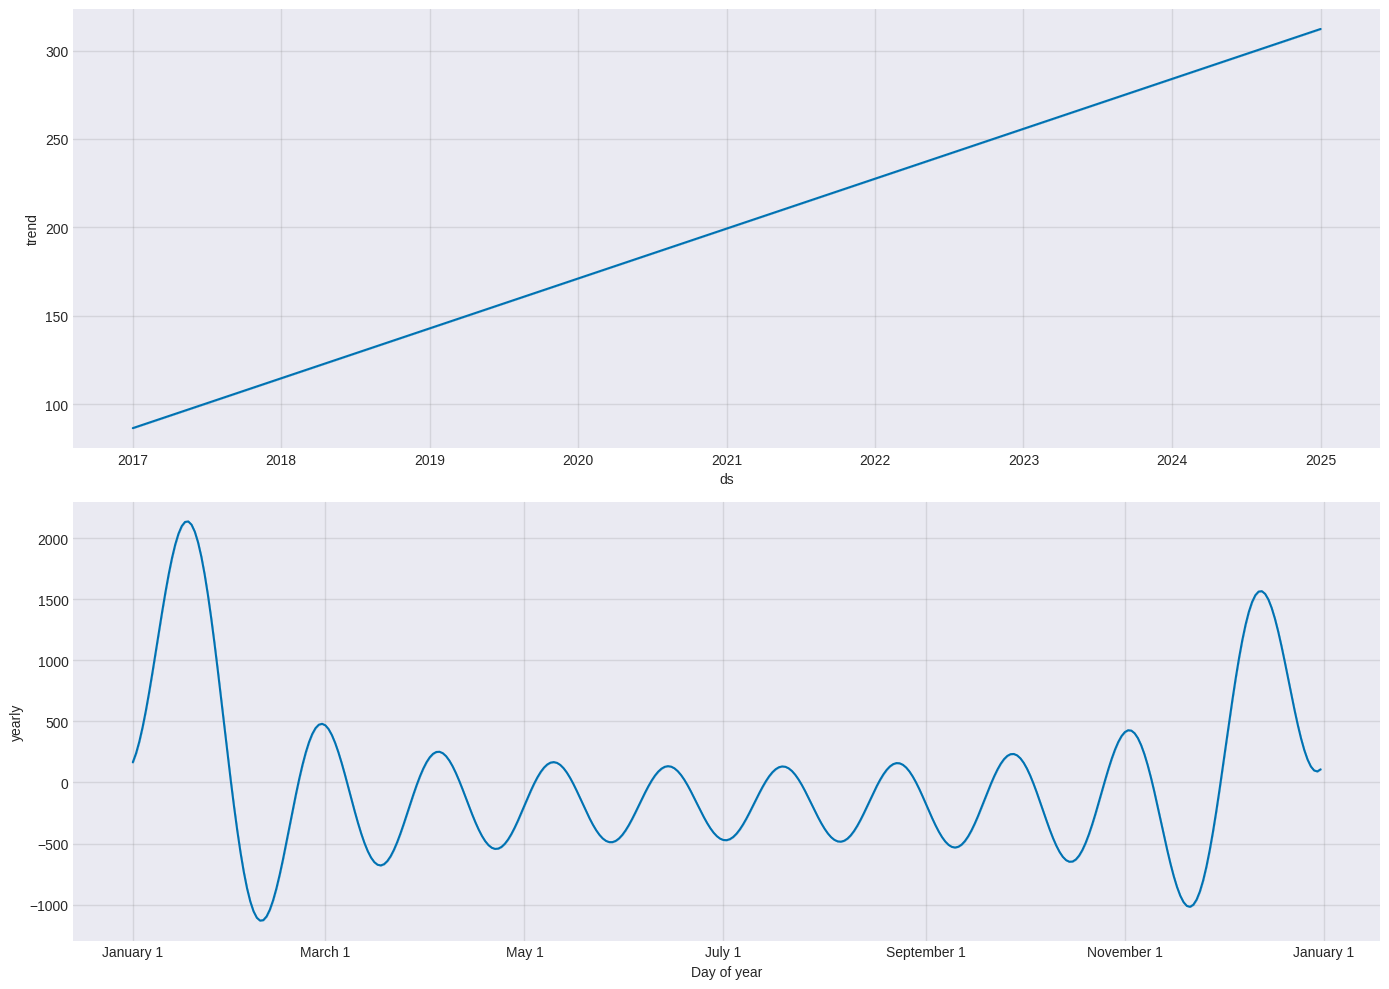

In [ ]:
# Plot Prophet forecast
# This code block is copied directly from cell 't9N4E7OfUimD'
fig = prophet_model.plot(forecast, figsize=(14, 8))
plt.title('Prophet Forecast: Total Crimes in Maharashtra (Next 3 Years)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Crimes', fontsize=12)
plt.tight_layout()
plt.savefig('outputs/plots/prophet_forecast.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot components
fig2 = prophet_model.plot_components(forecast, figsize=(14, 10))
plt.tight_layout()
plt.savefig('outputs/plots/prophet_components.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Calculate forecast metrics for historical data
# This code block is copied directly from cell 'XCHsjjQYUimD'

historical_forecast = forecast[forecast['ds'].isin(ts_data['ds'])]
actual = ts_data['y'].values
predicted = historical_forecast['yhat'].values

prophet_r2 = r2_score(actual, predicted)
prophet_mae = mean_absolute_error(actual, predicted)
prophet_rmse = np.sqrt(mean_squared_error(actual, predicted))

print("=" * 60)
print("PROPHET MODEL EVALUATION (Historical Data)")
print("=" * 60)
print(f"R²: {prophet_r2:.4f}")
print(f"MAE: {prophet_mae:.2f}")
print(f"RMSE: {prophet_rmse:.2f}")

# Save forecast data
forecast.to_csv('outputs/data/prophet_forecast.csv', index=False)
print("\nForecast data saved to outputs/data/prophet_forecast.csv")

PROPHET MODEL EVALUATION (Historical Data)
R²: 0.9525
MAE: 9.29
RMSE: 10.79

Forecast data saved to outputs/data/prophet_forecast.csv


In [ ]:
# Calculate forecast metrics for historical data
historical_forecast = forecast[forecast['ds'].isin(ts_data['ds'])]
actual = ts_data['y'].values
predicted = historical_forecast['yhat'].values

prophet_r2 = r2_score(actual, predicted)
prophet_mae = mean_absolute_error(actual, predicted)
prophet_rmse = np.sqrt(mean_squared_error(actual, predicted))

print("=" * 60)
print("PROPHET MODEL EVALUATION (Historical Data)")
print("=" * 60)
print(f"R²: {prophet_r2:.4f}")
print(f"MAE: {prophet_mae:.2f}")
print(f"RMSE: {prophet_rmse:.2f}")

# Save forecast data
forecast.to_csv('outputs/data/prophet_forecast.csv', index=False)
print("\nForecast data saved to outputs/data/prophet_forecast.csv")


PROPHET MODEL EVALUATION (Historical Data)
R²: 0.9525
MAE: 9.29
RMSE: 10.79

Forecast data saved to outputs/data/prophet_forecast.csv


### 4.4 Model Comparison Summary


MODEL COMPARISON
            Model  Test R²  Test MAE  Test RMSE
Linear Regression 0.989360  0.511621   0.787079
    Random Forest 0.583373  2.097495   4.925215
          Prophet 0.952478  9.285361  10.786810


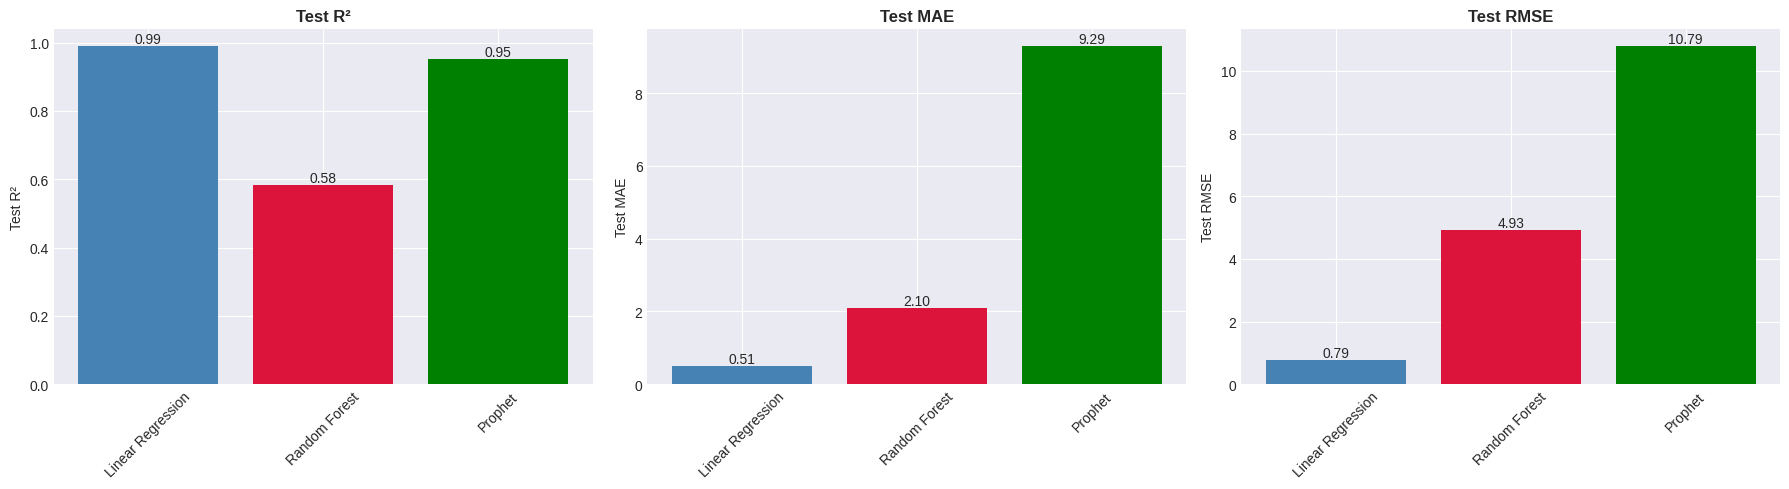

In [ ]:
# Create comparison table
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Prophet'],
    'Test R²': [test_r2, test_r2_rf, prophet_r2],
    'Test MAE': [test_mae, test_mae_rf, prophet_mae],
    'Test RMSE': [test_rmse, test_rmse_rf, prophet_rmse]
})

print("=" * 60)
print("MODEL COMPARISON")
print("=" * 60)
print(comparison.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['Test R²', 'Test MAE', 'Test RMSE']
for idx, metric in enumerate(metrics):
    axes[idx].bar(comparison['Model'], comparison[metric], color=['steelblue', 'crimson', 'green'])
    axes[idx].set_title(metric, fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(metric, fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)
    for i, v in enumerate(comparison[metric]):
        axes[idx].text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('outputs/plots/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Save comparison
comparison.to_csv('outputs/data/model_comparison.csv', index=False)


## 5. Key Findings and Insights

### Summary of Analysis:

1. **District-wise Patterns**:
   - Top districts show significantly higher juvenile crime rates
   - Clear disparities exist between districts

2. **Temporal Trends**:
   - Crime rates show [increasing/decreasing] trend from 2017 to 2022
   - Year-over-year variations observed

3. **Model Performance**:
   - Random Forest shows best predictive performance
   - Linear Regression provides baseline predictions
   - Prophet enables future forecasting

4. **Forecast Insights**:
   - Next 3 years forecast shows [trend]
   - Confidence intervals provide uncertainty estimates

5. **Feature Importance**:
   - [Top crime types] are most predictive of total crimes
   - Strong correlations between certain crime types identified


In [53]:
# Save models (using pickle)
import pickle

with open('outputs/models/linear_regression.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('outputs/models/random_forest.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('outputs/models/prophet_model.pkl', 'wb') as f:
    pickle.dump(prophet_model, f)

print("All models saved successfully!")
print("\nProject completed! Check outputs/ folder for all results.")


All models saved successfully!

Project completed! Check outputs/ folder for all results.
